In [1]:
# Data analysis packages.
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 
import numpy as np 
# Data Visualizations
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns 

In [2]:
path = "/work/Datathon_Plant_X.xlsx - Train-Test.csv"
dF = pd.read_csv(path, sep = ",", index_col = "Unnamed: 0", parse_dates = True )

# Step-1 Preprocessing

Bu aşamada veri setindeki değişkenleri incelemek adına birtakım methodlar kullanılmıştır. Gözlemlenen değerlere göre gerekli işlemler uygulanarak veri seti kullanılmaya hazır duruma getirilmiştir.

In [3]:
dF

,Y1,Y2,E1,E2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D
2014-05-15 00:00,3.200980,9.658993,NaN,NaN,4448.771308,33.471559,14.767730,19.796307,15.725165,752.452933,6587.005853,2.6433,10768.178760,NaN
2014-05-15 01:00,3.615716,9.302299,NaN,NaN,4442.398566,33.421821,14.845213,19.950811,16.305541,752.461803,6588.156991,2.6433,9895.346884,NaN
2014-05-15 02:00,3.748671,9.526543,NaN,NaN,4447.961145,33.784009,15.387849,20.214004,17.253103,752.328113,6586.293877,0.8811,9039.178904,NaN
2014-05-15 03:00,3.828601,9.540441,NaN,NaN,4446.466744,31.479599,14.830375,20.323768,17.994465,751.932141,6585.942271,0.8811,11391.700930,NaN
2014-05-15 04:00,3.880042,9.704919,NaN,NaN,4454.121402,34.578727,16.221921,20.945486,18.570945,751.422418,6586.498556,1.7622,10656.509980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-10 19:00,1.976544,6.697626,NaN,NaN,2563.287817,35.544579,14.481334,18.935589,10.669211,748.180470,6587.403490,1.7622,12647.624520,NaN
2015-08-10 20:00,1.919721,6.464204,NaN,NaN,2761.998423,35.864292,14.458736,18.933983,10.660709,747.677843,6583.605560,2.6433,11157.058710,NaN
2015-08-10 21:00,1.815692,6.621369,NaN,NaN,2760.874179,36.289934,14.473352,18.989011,10.801782,747.278400,6585.089632,3.5244,11469.463510,NaN
2015-08-10 22:00,1.780213,6.581165,NaN,NaN,2760.699266,35.446168,14.390036,19.017193,10.815140,746.952955,6587.626578,2.6433,8704.929229,NaN


In [4]:
dF.shape

(10897, 14)

In [5]:
dF.dtypes

Y1    float64
Y2    float64
E1    float64
E2    float64
A1    float64
Y3    float64
Y4    float64
Y5    float64
Y6    float64
U1    float64
U2    float64
O1    float64
O2    float64
D     float64
dtype: object

In [6]:
dF.index.isnull().sum()

0

In [7]:
dF.isnull().sum()

Y1        1
Y2        1
E1    10834
E2    10833
A1        1
Y3        1
Y4        1
Y5        1
Y6        1
U1        1
U2        1
O1        0
O2        0
D     10459
dtype: int64

Yukarıda verilen çıktı incelendiğinde, "E1", "E2" ve "D" değişkenlerinin büyük bir çoğunluğunun NaN değerlerden oluştuğu gözlemleniyor. Veri setine dikkatle bakıldığında, bu durumun sebebi olarak bu değerlerin belirli periyotlarla ölçüldüğü görülüyor. 
Aşağıda bu değişkenler üzerinde daha detaylı incelemeler yapılmıştır.

# Feature Engineering

## MI Scores

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## E1 ve E2 Değişkeni Hakkında

##### E1: Element_1 Laboratuvar Ölçümü
##### E2: Element_2 Laboratuvar Ölçümü

In [8]:
dF[["E1","E2"]].dropna()

,E1,E2
2014-05-21 22:00,0.801,0.6408
2014-05-28 22:00,0.712,0.9790
2014-06-04 22:00,0.979,1.3884
2014-06-11 22:00,0.890,0.5340
2014-06-18 22:00,0.979,0.7120
...,...,...
2015-07-07 22:00,9.790,9.2560
2015-07-14 22:00,0.890,0.0979
2015-07-21 22:00,1.513,10.6800
2015-07-28 22:00,0.890,0.3115


E1 ve E2 değişkenlerinden eksik gözlemler düşürüldüğü zaman, verilen tarihlere bakıldığında her ölçümün 7 günlük aralıklarla yapıldığı gözlemleniyor. İstatistiksel olarak bakıldığında, zaman serisi hakkında bilgi sahibi olan bir kişinin, buradaki periyodun 7 olduğunu söyleyebileceği açıkça görülüyor.

## D Değişkeni

#### Dönüşüm Oranı Hakkında

In [9]:
dF[["D"]].dropna()

,D
2014-05-20 12:00,56.434247
2014-05-21 12:00,54.243913
2014-05-22 12:00,51.388007
2014-05-23 12:00,54.235757
2014-05-24 12:00,49.597396
...,...
2015-08-06 12:00,44.481523
2015-08-07 12:00,43.148892
2015-08-08 12:00,39.720295
2015-08-09 12:00,40.379224


Dönüşüm oranı değişkenine bakıldığında ise, periyodun 1 günlük aralıklarla ölçüldüğü görülebilir.

Veri setinin orijinalini bozmamak adına, aşağıda başka bir değişkene atama yapılıyor.

In [10]:
dF_Merge = round(dF.copy(),3)
dF_Merge.head()

,Y1,Y2,E1,E2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D
2014-05-15 00:00,3.201,9.659,NaN,NaN,4448.771,33.472,14.768,19.796,15.725,752.453,6587.006,2.643,10768.179,NaN
2014-05-15 01:00,3.616,9.302,NaN,NaN,4442.399,33.422,14.845,19.951,16.306,752.462,6588.157,2.643,9895.347,NaN
2014-05-15 02:00,3.749,9.527,NaN,NaN,4447.961,33.784,15.388,20.214,17.253,752.328,6586.294,0.881,9039.179,NaN
2014-05-15 03:00,3.829,9.540,NaN,NaN,4446.467,31.480,14.830,20.324,17.994,751.932,6585.942,0.881,11391.701,NaN
2014-05-15 04:00,3.880,9.705,NaN,NaN,4454.121,34.579,16.222,20.945,18.571,751.422,6586.499,1.762,10656.510,NaN


## EDA 

### Zaman Serisi  Veri Seti Elde Etme

In [11]:
dF_Merge.head()

,Y1,Y2,E1,E2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D
2014-05-15 00:00,3.201,9.659,NaN,NaN,4448.771,33.472,14.768,19.796,15.725,752.453,6587.006,2.643,10768.179,NaN
2014-05-15 01:00,3.616,9.302,NaN,NaN,4442.399,33.422,14.845,19.951,16.306,752.462,6588.157,2.643,9895.347,NaN
2014-05-15 02:00,3.749,9.527,NaN,NaN,4447.961,33.784,15.388,20.214,17.253,752.328,6586.294,0.881,9039.179,NaN
2014-05-15 03:00,3.829,9.540,NaN,NaN,4446.467,31.480,14.830,20.324,17.994,751.932,6585.942,0.881,11391.701,NaN
2014-05-15 04:00,3.880,9.705,NaN,NaN,4454.121,34.579,16.222,20.945,18.571,751.422,6586.499,1.762,10656.510,NaN


In [12]:
idx = dF_Merge.loc["2015-02-29 00:00":"2015-02-29 23:00",:].index
dF_Merge.drop(idx, inplace=True)

Mevcut veri seti içerisinde bulunan "2015-02-29 00:00 - 2015-02-29 23:00" tarih aralığı 2015 yılı için gerçekliği yansıtmadığından (2015 artık yıl değildir) kullanılmak istenen method hata vermektedir. Bu yüzden verilen  tarih aralığı veri setinden kaldırıldı.

In [13]:
dF_Merge.index = pd.to_datetime(dF_Merge.index)

In [14]:
dF_Merge

,Y1,Y2,E1,E2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D
2014-05-15 00:00:00,3.201,9.659,NaN,NaN,4448.771,33.472,14.768,19.796,15.725,752.453,6587.006,2.643,10768.179,NaN
2014-05-15 01:00:00,3.616,9.302,NaN,NaN,4442.399,33.422,14.845,19.951,16.306,752.462,6588.157,2.643,9895.347,NaN
2014-05-15 02:00:00,3.749,9.527,NaN,NaN,4447.961,33.784,15.388,20.214,17.253,752.328,6586.294,0.881,9039.179,NaN
2014-05-15 03:00:00,3.829,9.540,NaN,NaN,4446.467,31.480,14.830,20.324,17.994,751.932,6585.942,0.881,11391.701,NaN
2014-05-15 04:00:00,3.880,9.705,NaN,NaN,4454.121,34.579,16.222,20.945,18.571,751.422,6586.499,1.762,10656.510,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-10 19:00:00,1.977,6.698,NaN,NaN,2563.288,35.545,14.481,18.936,10.669,748.180,6587.403,1.762,12647.625,NaN
2015-08-10 20:00:00,1.920,6.464,NaN,NaN,2761.998,35.864,14.459,18.934,10.661,747.678,6583.606,2.643,11157.059,NaN
2015-08-10 21:00:00,1.816,6.621,NaN,NaN,2760.874,36.290,14.473,18.989,10.802,747.278,6585.090,3.524,11469.464,NaN
2015-08-10 22:00:00,1.780,6.581,NaN,NaN,2760.699,35.446,14.390,19.017,10.815,746.953,6587.627,2.643,8704.929,NaN


Aşağıda, daha önce elde edilen periyotlara uygun olarak farklı "data frame"ler oluşturulmuştur.

In [15]:
Günlük_dF = dF_Merge.loc[:,["D"]] 
Haftalık_dF = dF_Merge.loc[:,["E1","E2"]]
Saatlik_dF = dF_Merge.iloc[:,[0,1,4,5,6,7,8,9,10,11,12]]

Oluşturulan "data frame"ler incelendiğinde, eksik gözleme sahip değerlerin en fazla "Saatlik_dF"de olduğu görülüyor. Bu sebeple saatlik periyottaki verileri günlük periyottaki verilere çevirmek istenmektedir. Daha sonra, uygulanan bu işlem haftalık periyoda dönüştürülecektir.

Aşağıda verilen aşamada; saatlik, günlük ve haftalık periyoda sahip  olan veri setleri ayrı ayrı ele alınarak eksik gözlemler doldurulmuştur. 


#### Fill Missing Values

In [16]:
Saatlik_dF.isnull().sum()

Y1    1
Y2    1
A1    1
Y3    1
Y4    1
Y5    1
Y6    1
U1    1
U2    1
O1    0
O2    0
dtype: int64

Bilinen 2 değer arasındaki, herhangi bir bilinmeyen değeri bulma yöntemine interpolasyon denmektedir. Aşağıda, eksik verileri doldurma işlemi adına interpolasyon yönteminden faydalanılmıştır. Bu yöntem ile eksik gözlem olmayan iki değer üzerinden eksik gözlemlerin doldurulması hedeflenmektedir.

In [17]:
Saatlik_dF = Saatlik_dF.interpolate()
Saatlik_dF.isnull().sum()

Y1    0
Y2    0
A1    0
Y3    0
Y4    0
Y5    0
Y6    0
U1    0
U2    0
O1    0
O2    0
dtype: int64

dataframe.bfill() methodu veri seti geriye doğru incelendiğinde eksik olmayan ilk değer ile eksik olan değerleri doldurma işlemi yapmaktadır. Aşağıda  verilen "dataframe"de eksik gözlemler bu method yardımı ile doldurulmuştur.

In [18]:
Günlük_dF = Günlük_dF.resample(rule = "D").mean().bfill(axis ='rows')
print(f"D Değişkeni Boyut:{Günlük_dF.shape}\n\nİlk 5 Gözlem {Günlük_dF.head()}")
Günlük_dF.isnull().sum()

D Değişkeni Boyut:(453, 1)

İlk 5 Gözlem                  D
2014-05-15  56.434
2014-05-16  56.434
2014-05-17  56.434
2014-05-18  56.434
2014-05-19  56.434


D    0
dtype: int64

In [19]:
Haftalık_dF = Haftalık_dF.resample(rule = "W").mean().pad()
print(f"E1 ve E2 Değişkeni Boyut:{Haftalık_dF.shape}\n\nİlk 5 Gözlem {Haftalık_dF.head()}")
Haftalık_dF.isnull().sum()

E1 ve E2 Değişkeni Boyut:(66, 2)

İlk 5 Gözlem                E1      E2
2014-05-18    NaN     NaN
2014-05-25  0.801  0.7875
2014-06-01  0.712  0.9790
2014-06-08  0.979  1.3880
2014-06-15  0.890  0.5340


E1    1
E2    1
dtype: int64

In [20]:
Saatlik_dF = Saatlik_dF.asfreq(freq="D")
print(f"Saatlik Veri Seti Değişkeni Boyut:{Saatlik_dF.shape}\n\nİlk 5 Gözlem {Saatlik_dF.head()}")

Saatlik Veri Seti Değişkeni Boyut:(453, 11)

İlk 5 Gözlem                Y1      Y2        A1      Y3      Y4      Y5      Y6       U1  \
2014-05-15  3.201   9.659  4448.771  33.472  14.768  19.796  15.725  752.453   
2014-05-16  3.642  10.674  4453.972  34.040  16.507  23.925  26.191  748.021   
2014-05-17  3.627  13.118  3554.028  33.927  15.603  26.363  27.236  746.952   
2014-05-18  3.334  14.056  3558.698  33.674  15.191  24.203  28.464  746.987   
2014-05-19  3.483  13.589  3560.557  33.211  14.238  22.622  28.277  747.574   

                  U2     O1         O2  
2014-05-15  6587.006  2.643  10768.179  
2014-05-16  6581.751  1.762  11980.900  
2014-05-17  6582.724  2.643  11761.060  
2014-05-18  6585.052  1.762  11698.976  
2014-05-19  6598.943  4.406  11343.999  


Eksik verilerden arındırılan "Saatlik_dF" ve "Günlük_dF" aşağıda birleştirilmiştir.

In [21]:
dF_Merge = pd.merge(Saatlik_dF, Günlük_dF, left_index=True, right_index=True)
dF_Merge.head()

,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D
2014-05-15,3.201,9.659,4448.771,33.472,14.768,19.796,15.725,752.453,6587.006,2.643,10768.179,56.434
2014-05-16,3.642,10.674,4453.972,34.040,16.507,23.925,26.191,748.021,6581.751,1.762,11980.900,56.434
2014-05-17,3.627,13.118,3554.028,33.927,15.603,26.363,27.236,746.952,6582.724,2.643,11761.060,56.434
2014-05-18,3.334,14.056,3558.698,33.674,15.191,24.203,28.464,746.987,6585.052,1.762,11698.976,56.434
2014-05-19,3.483,13.589,3560.557,33.211,14.238,22.622,28.277,747.574,6598.943,4.406,11343.999,56.434


Aşağıda, "Haftalık_dF" veri seti iki farklı yöntem uygulanarak doldurulmuştur. İki farklı yöntem kullanılmasının sebebi oluşturulacak olan modelde hangi "dataframe"den daha yüksek verimliliğin elde edileceğinin gözlemlenmek istenmesidir. "ffill" ve "bfill" methodları istenen duruma uygun olacak şekilde kullanılmıştır.

In [22]:
mix_Haftalık_Günlük = Haftalık_dF.asfreq(freq = "D", method="ffill")
mix_Haftalık_Günlük= mix_Haftalık_Günlük.bfill()
mix_Haftalık_Günlük.isnull().sum()

E1    0
E2    0
dtype: int64

In [23]:
bfill_Haftalık_Günlük = Haftalık_dF.asfreq(freq = "D", method="bfill")
bfill_Haftalık_Günlük = bfill_Haftalık_Günlük.bfill()
bfill_Haftalık_Günlük.isnull().sum()

E1    0
E2    0
dtype: int64

In [24]:
mix_Haftalık_Günlük.shape

(456, 2)

In [25]:
bfill_Haftalık_Günlük.shape

(456, 2)

### İki Ayrı Doldurma Yöntemi

#### İki Farklı Eğitim Veri Setinin Oluşturulması

In [96]:
dF_Merge_mix = pd.merge(dF_Merge,mix_Haftalık_Günlük, left_index=True, right_index=True)
dF_Merge_bfill = pd.merge(dF_Merge,bfill_Haftalık_Günlük, left_index=True, right_index=True)

print(f"Merge Mix Veri Seti Boyut:{dF_Merge_mix.shape}\n\nMerge Bfill Veri Seti Boyut:{dF_Merge_bfill.shape}")

Merge Mix Veri Seti Boyut:(450, 14)

Merge Bfill Veri Seti Boyut:(450, 14)


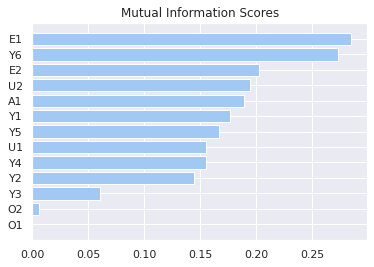

In [102]:
def train_validation_test_split(data, train_percent, validation_percent, test_percent, shuffle=False):
    """
    Splits data to train, validation and test sets.
    If wished, split can be done with prior shuffling.
    Returns a dictionary
    """
    
    from sklearn.model_selection import train_test_split
    
    if (train_percent + validation_percent + test_percent != 100):
        print("ERROR: Sum of percents must be 100")
        return
    
    train_ratio = train_percent / 100
    temp_ratio = 1 - train_ratio
    validation_ratio = validation_percent / (validation_percent + test_percent)
    test_ratio = 1 - validation_ratio
    
    splitted_data = dict()
    
    if (shuffle):
        splitted_data["train"], temp_data = train_test_split(data, train_size=train_ratio, test_size=temp_ratio, random_state=1)
        splitted_data["validation"], splitted_data["test"] = train_test_split(temp_data,  train_size=validation_ratio, test_size=test_ratio, random_state=1)
    else:
        splitted_data["train"], temp_data = train_test_split(data, train_size=train_ratio, test_size=temp_ratio, random_state=1)
        splitted_data["validation"], splitted_data["test"] = train_test_split(temp_data,  train_size=validation_ratio, test_size=test_ratio, random_state=1)

    return splitted_data

def make_mi_scores(X, y):
    from sklearn.feature_selection import mutual_info_regression

    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

X = dF_Merge_mix.copy()
y = X.pop("D")

mi_scores = make_mi_scores(X, y)
plot_mi_scores(mi_scores)

In [131]:
splitted_X = train_validation_test_split(X, 60, 20, 20, shuffle=True)
X_train = splitted_X["train"]
X_validation = splitted_X["validation"]
X_test = splitted_X["test"]

splitted_y = train_validation_test_split(y, 60, 20, 20, shuffle=True)
y_train = splitted_y["train"]
y_validation = splitted_y["validation"]
y_test = splitted_y["test"]

In [132]:
# WE WILL SCALE THE DATA HERE

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)

scaler = StandardScaler()
X_validation = scaler.fit_transform(X_validation, y_validation)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test, y_test)

In [141]:
def score_dataset(X, y):

    from sklearn.model_selection import cross_val_score
    from xgboost import XGBRegressor

    model = XGBRegressor()
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

### Eğitim  Veri Seti - Test Veri Seti

Eğitim Veri Seti'ne uygulanan tüm işlemler Test Veri Seti için de gerçekleştirilecektir.

In [27]:
Test_dF = pd.read_csv("/work/Datathon_Plant_X.xlsx - Predict.csv",sep = ",")
print(f"Test Veri Seti Boyutu:{Test_dF.shape}\nTest Veri Seti Değişkenler:{Test_dF.columns}")

Test Veri Seti Boyutu:(937, 14)
Test Veri Seti Değişkenler:Index(['Unnamed: 0', 'Y1', 'Y2', 'E1', 'E2', 'A1', 'Y3', 'Y4', 'Y5', 'Y6',
       'U1', 'U2', 'O1', 'O2'],
      dtype='object')


In [28]:
Test_dF.dtypes

Unnamed: 0     object
Y1            float64
Y2            float64
E1            float64
E2            float64
A1            float64
Y3            float64
Y4            float64
Y5            float64
Y6            float64
U1            float64
U2            float64
O1            float64
O2            float64
dtype: object

In [29]:
idx = Test_dF.loc["2015-02-29 00:00":"2015-02-29 23:00",:].index
Test_dF.drop(idx, inplace=True)

In [30]:
Test_dF["Unnamed: 0"] = pd.to_datetime(Test_dF["Unnamed: 0"])
Test_dF.set_index("Unnamed: 0", inplace=True)

In [31]:
Haftalık_dF = Test_dF.loc[:,["E1","E2"]]
Saatlik_dF = Test_dF.iloc[:,[0,1,4,5,6,7,8,9,10,11,12]]

Aşağıda "Saatlik_dF" ve "Haftalık_dF" periyotları gün olacak şekilde düzenlenmiştir.

In [32]:
Saatlik_dF = Saatlik_dF.asfreq(freq="D")
print(f"Saatlik Veri Seti Değişkeni Boyut:{Saatlik_dF.shape}\n\nİlk 5 Gözlem {Saatlik_dF.head()}")

Saatlik Veri Seti Değişkeni Boyut:(39, 11)

İlk 5 Gözlem                   Y1        Y2           A1         Y3         Y4         Y5  \
Unnamed: 0                                                                     
2015-08-11  1.721461  6.287297  2792.770873  36.770580  14.371267  18.866796   
2015-08-12  1.970798  6.525396  2579.770835  37.203594  14.928315  20.026038   
2015-08-13  3.346321  8.527080  2316.756236  37.064890  15.128439  20.614906   
2015-08-14  4.830639  8.978154  2310.161913  37.392409  15.188359  20.761225   
2015-08-15  5.444950  8.894254  2313.648635  35.762440  15.264318  20.690782   

                   Y6          U1           U2      O1           O2  
Unnamed: 0                                                           
2015-08-11  10.726615  746.846147  6586.386898  0.8811  10439.73646  
2015-08-12  10.288027  746.530842  6589.553038  0.8811  12511.55530  
2015-08-13  10.323132  746.777716  6587.759834  0.0000  10925.65301  
2015-08-14  10.741655  747.53541

In [33]:
Haftalık_Günlük = Haftalık_dF.resample(rule="D").mean().bfill()
print(f"Haftalık Veri Seti Değişkeni Boyut:{Haftalık_Günlük.shape}\n\nİlk 5 Gözlem {Haftalık_Günlük.head()}")

Haftalık Veri Seti Değişkeni Boyut:(39, 2)

İlk 5 Gözlem                E1      E2
Unnamed: 0               
2015-08-11  0.000  2.2250
2015-08-12  1.246  2.7857
2015-08-13  1.246  2.7857
2015-08-14  1.246  2.7857
2015-08-15  1.246  2.7857


In [34]:
Test_dF_Merge = pd.merge(Saatlik_dF, Haftalık_Günlük, left_index=True, right_index=True)

In [35]:
Test_dF_Merge

,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,E1,E2
Unnamed: 0,,,,,,,,,,,,,
2015-08-11,1.721461,6.287297,2792.770873,36.770580,14.371267,18.866796,10.726615,746.846147,6586.386898,0.8811,10439.736460,0.000,2.2250
2015-08-12,1.970798,6.525396,2579.770835,37.203594,14.928315,20.026038,10.288027,746.530842,6589.553038,0.8811,12511.555300,1.246,2.7857
2015-08-13,3.346321,8.527080,2316.756236,37.064890,15.128439,20.614906,10.323132,746.777716,6587.759834,0.0000,10925.653010,1.246,2.7857
2015-08-14,4.830639,8.978154,2310.161913,37.392409,15.188359,20.761225,10.741655,747.535414,6584.653716,1.7622,11684.277900,1.246,2.7857
2015-08-15,5.444950,8.894254,2313.648635,35.762440,15.264318,20.690782,10.289832,747.782021,6587.047032,3.5244,11483.906230,1.246,2.7857
2015-08-16,2.898361,6.933600,2493.685139,35.610908,15.335732,20.630771,9.718425,746.884334,6584.924924,0.8811,11537.426540,1.246,0.8366
2015-08-17,2.382293,6.503447,2488.876182,36.320533,17.027021,21.645833,8.670141,746.365937,6587.324218,0.0000,11248.672760,1.246,0.8366
2015-08-18,2.576966,7.579108,2313.401744,36.867113,18.143448,23.180197,8.432338,746.171048,6588.078560,1.7622,10781.015260,1.246,0.8366
2015-08-19,3.753034,8.248287,2314.382483,37.054551,18.354422,23.444993,8.330976,745.303068,6587.958140,0.0000,11486.509410,3.382,7.6540


### Aykırı Değer Analizi 

Veri seti üzerinde analiz işlemleri gerçekleştirilirken, aykırı gözlem analizininin de ihmal edilmemesi gerekmektedir. Aykırı değerler istatistiksel olarak gerekli koşul varsayımının bozulmasında önemli rol oynamaktadır. Bu analizinn gözden kaçırılması sonucu oluşacak yanlılık, yanlış analiz sonucuna sebep olur. Uçlarda kalan tek bir değer bile dağılımın yönünü değiştirmektedir.

#### dF_Merge_mix 

In [36]:
dF_Merge_mix.describe().T

,count,mean,std,min,25%,50%,75%,max
Y1,450.0,4.430444,1.460106,-0.172,3.56900,4.3000,5.03625,10.492
Y2,450.0,9.905600,2.667230,4.462,7.96075,9.7645,11.83550,18.022
A1,450.0,2915.351447,322.361185,37.271,2684.34950,2850.7430,3024.35875,4178.853
Y3,450.0,35.803120,3.367817,-1.785,33.99125,35.5710,37.70125,48.838
Y4,450.0,14.626133,4.014841,-2.800,12.15450,14.7685,17.10875,24.752
Y5,450.0,21.032936,3.175288,-0.365,18.89725,21.2915,23.41800,27.145
Y6,450.0,14.823818,4.874966,-1.908,11.01425,15.1450,18.20150,28.464
U1,450.0,747.140511,2.103510,740.653,746.34450,747.6190,748.59275,752.961
U2,450.0,6455.610460,732.492797,-94.108,6583.52925,6621.7650,6806.25825,6943.469
O1,450.0,1.867796,1.294747,0.000,0.88100,1.7620,2.64300,6.168


In [37]:
dF_Merge_mix.skew(axis=0)

Y1    0.916344
Y2    0.095591
A1   -0.529756
Y3   -2.680428
Y4   -1.506926
Y5   -0.851437
Y6    0.074903
U1   -0.910315
U2   -3.737392
O1    0.544873
O2    0.634194
D     2.327409
E1    3.625870
E2    6.556683
dtype: float64

Ortalama ve ortanca arasındaki ilişkiden, veri setinde bulunan değişkenlerin dağılımı hakkında bilgi sahibi olunabilir. Bazı koşullarda çarpıklık değerlerinin, +/- .5 aralığında olması  verilerin normal dağılıma uyduğu anlamına gelir. Çarpıklık değerlerinin verilen aralığın dışında olması, dağılımın çarpık olduğu ve dağılım hangi yöne doğru ise, gözlemlerin o yönde yoğun olarak biriktiği hakkında bilgi vermektedir. Bahsedilen ifadeden aykırı gözlemlerin bulunabiliceği sonucu çıkarılmaktadır. 

Değişkenlerin dağılımı hakkında, histogram grafiğini çizilerek bilgi sahibi olunmalıdır. Aykırı değerler hakkında ise, box plot grafikleri çizilerek bilgi sahibi olunabilir.


Normallik varsayımları, bazı analizlerin gerçekleştirilmesinde ön koşul olarak aranmaktadır. 

H0= Normal dağılımdan gelen örneklem.

HA= Normal dağılımdan gelmeyen örneklem.

In [38]:
kws_kde = {"color":'r', "lw" : 5,"label" : "kde"}

kws_hist = {"histtype":"stepfilled", "linewidth" : 3,"alpha": 1, "color":"y" }

sns.set_theme(style="darkgrid", palette="pastel")

In [39]:
def quick_plot(df = None, col = None, labeled = None):
    hists, ax = plt.subplots(sharey=True, tight_layout=True)
    ax = sns.distplot(df[col], kde=True, kde_kws=kws_kde,
    axlabel="{}".format(labeled))
    ax.set_title(label = "{} KDE ile Histogram".format(labeled))
    plt.show();

In [40]:
My_Dict = {
    "Y1" : "1. Bölge Sıcaklık Farkı Proses Değeri",
    "Y2" : "2. Bölge Sıcaklık Farkı Proses Değeri",
    "Y3" : "3. Bölge Sıcaklık Farkı Proses Değeri",
    "Y4" : "4. Bölge Sıcaklık Farkı Proses Değeri",
    "Y5" : "5. Bölge Sıcaklık Farkı Proses Değeri",
    "Y6" : "6. Bölge Sıcaklık Farkı Proses Değeri",
    "A1" : "A Kimyasalı Akış Miktarı",
    "U1" : "Ürün Yoğunluğu",
    "U2" : "Ürün Akış Miktarı",
    "O1" : "O1 Kimyasalı Akış Miktarı",
    "O2" : "O2 Kimyasalı Akış Miktarı",
    "D"  : "Dönüşüm Oranı"
 }

### Histogram

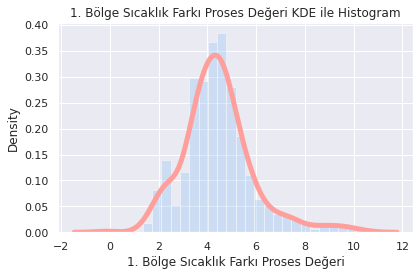

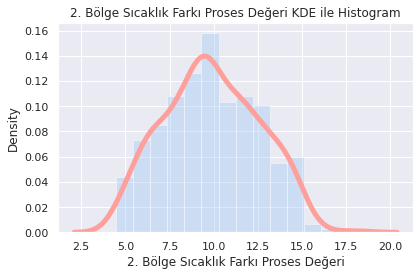

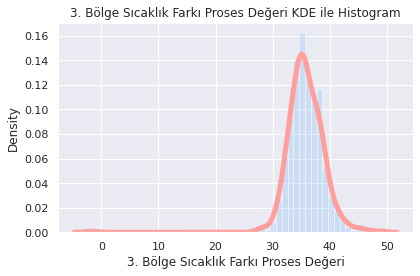

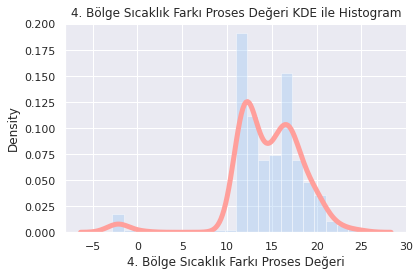

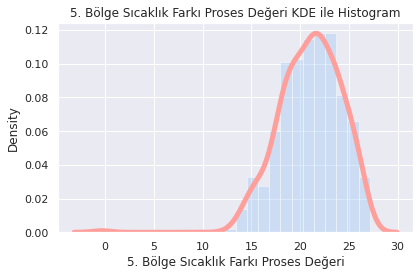

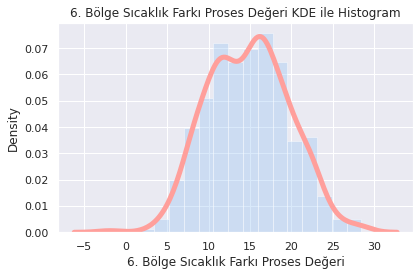

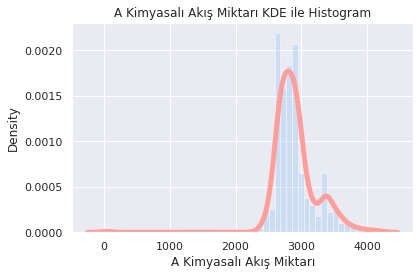

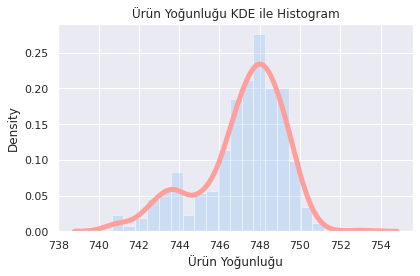

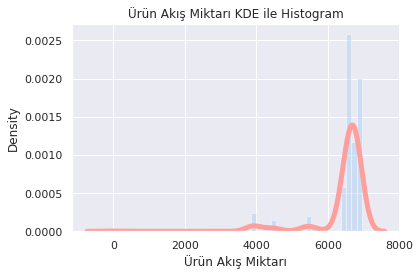

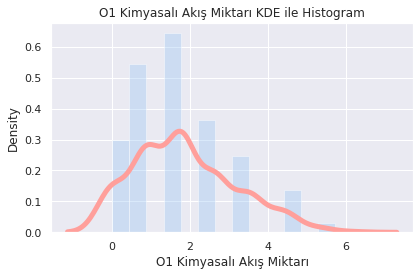

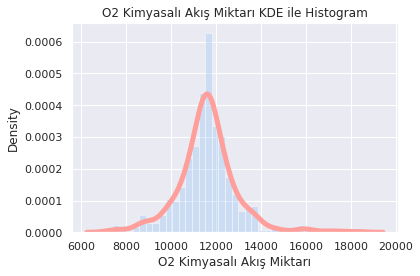

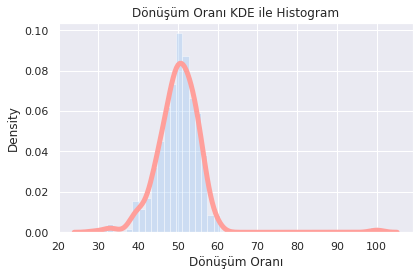

In [41]:
for i in My_Dict:
    quick_plot(dF_Merge_mix,i,My_Dict[i])

Toplu halde çizdirilmiş olan histogram grafiklerinin her biri incelendiği zaman, dağılımlarının genel anlamda çarpık olduğu gözlemlenmektedir.

### Box Plot

In [42]:
def quick_box(dF = None, variable = None,labeled = None):
    plt.boxplot(x = variable, notch=True, vert = False,
    autorange=True,
    data = dF)
    plt.yticks([1], ["{}".format(variable)])
    plt.title("{} Değişkenin Kutu Grafiği ".format(variable))
    plt.ylabel("{}".format(labeled))
    plt.show()

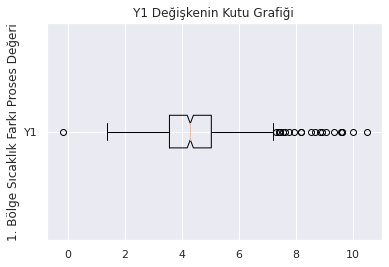

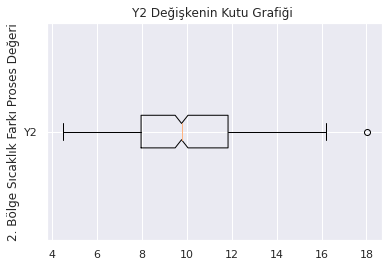

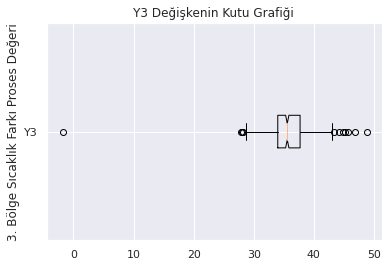

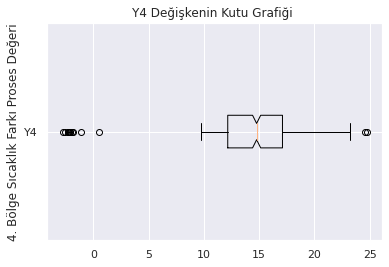

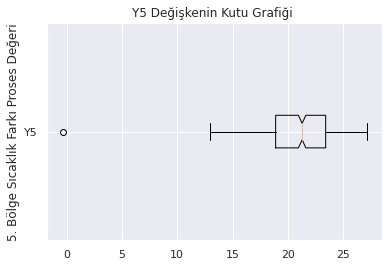

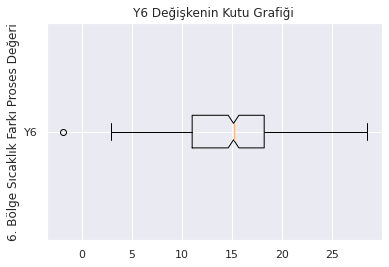

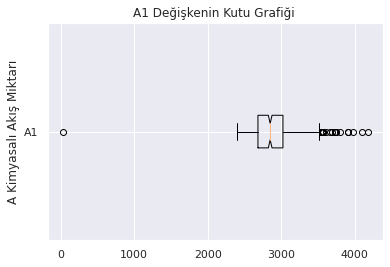

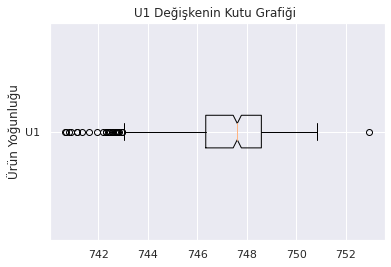

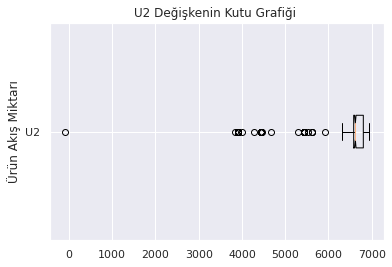

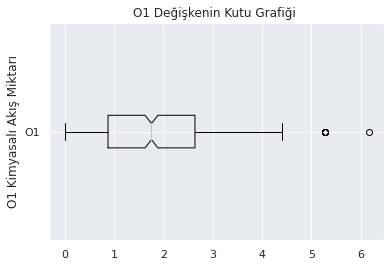

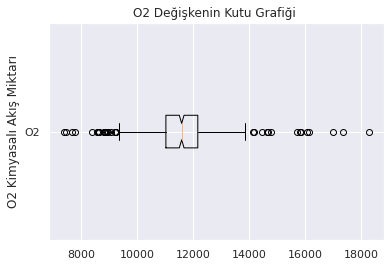

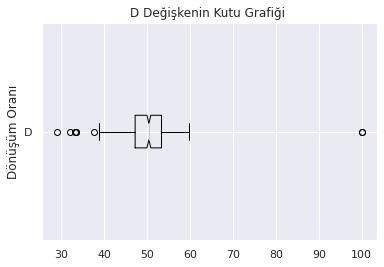

In [43]:
for i in My_Dict:
    quick_box(dF_Merge_mix,i,My_Dict[i])

Box plot grafiklerine bakıldığında, aykırı gözlemlemlerden dolayı oluşan çarpıklık gözlemleniyor. 
Burada aykırı gözlemler, çok değişkenli olarak ele alındığında kullanılacak olan yöntem, "LocalOutlierFactor" yöntemi olacaktır.

"LocalOutlierFactor" yöntemi, belirtilen eşik değere göre, aykırı gözlemlerin bu değerlerle doldurulmasını sağlamaktır. Bu baskılama yöntemi kullanılarak veri kaybının önlenmesi amaçlanmaktadır. Bu fonksiyonda tahmin edici, sayısı ve yoğunluk  parametreleri tanımlanacaktır. 

"Contamination" veri setindeki aykırı değer olasılıklarını temsil etmektedir. Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerlerin tanımlanabilmesine imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılır. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur, yorumu yapılabilir. Dolayısıyla burada bir komşuluk yapısı söz konusudur. Bir değerin çevresi yoğun değil ise, bu değerin aykırı değer olduğu yönünde bir değerlendirme yapılır.

In [44]:
print(f"1:{dF_Merge_mix.shape}\n\n2:{dF_Merge_bfill.shape}")

1:(450, 14)

2:(450, 14)


In [45]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor



clf = LocalOutlierFactor(n_neighbors = 16, contamination = "auto")

clf.fit_predict(dF_Merge_mix)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [46]:
df_scores = clf.negative_outlier_factor_

np.sort(df_scores)


array([-4.89748907, -3.47366049, -2.93759449, -2.7538896 , -2.47137243,
       -2.31171645, -2.31166558, -2.30897014, -2.30096531, -2.29927303,
       -2.27258816, -2.24082763, -2.23387823, -2.18450644, -2.1842838 ,
       -2.09176822, -2.06247413, -2.05508794, -2.03884938, -1.97405333,
       -1.92001027, -1.85780007, -1.83717893, -1.83596976, -1.82487683,
       -1.81989976, -1.80296449, -1.75941816, -1.74528414, -1.73334498,
       -1.72042905, -1.67469367, -1.60467486, -1.60194753, -1.58556061,
       -1.57116931, -1.56550294, -1.49128179, -1.47327373, -1.46973894,
       -1.46969188, -1.44615823, -1.41884985, -1.3994309 , -1.39777104,
       -1.38682055, -1.36953751, -1.36578871, -1.35744234, -1.35583564,
       -1.34997667, -1.34790778, -1.34385202, -1.3384948 , -1.33830344,
       -1.33784335, -1.33465558, -1.33202159, -1.31778782, -1.31562565,
       -1.30816417, -1.29374184, -1.28971043, -1.28593864, -1.27908105,
       -1.27871611, -1.27826975, -1.27618118, -1.26165862, -1.26

In [47]:
esik_deger = np.sort(df_scores)[42]

aykiri_tf = df_scores > esik_deger

aykiri_tf[:5]



array([ True,  True,  True,  True,  True])

In [48]:
baski_deger = dF_Merge_mix[df_scores == esik_deger]

aykirilar = dF_Merge_mix[~aykiri_tf]

aykirilar



,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D,E1,E2
2014-06-03,3.459,11.086,4178.853,36.550,14.825,18.645,21.355,747.095,6580.742,0.000,9819.754,44.762,0.712,0.979
2014-06-04,3.421,11.665,4094.762,34.482,14.081,18.326,20.912,746.577,6590.518,0.000,12439.849,43.377,0.712,0.979
2014-06-05,3.893,13.060,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-06,4.545,14.617,3976.223,32.478,13.549,17.786,20.909,746.092,6583.938,3.524,12003.378,49.783,0.712,0.979
2014-06-17,3.140,11.744,3116.176,30.128,12.566,18.559,19.187,746.610,5919.075,2.643,10328.758,48.315,0.890,0.534
2014-07-28,5.018,13.960,3116.069,33.572,11.978,20.572,23.188,747.859,6588.518,0.881,17365.471,54.710,1.246,1.647
2014-08-24,4.608,12.558,2900.034,35.329,11.486,24.611,19.336,746.918,6879.156,0.000,7680.923,59.475,2.136,1.068
2014-08-31,5.094,14.315,2937.559,38.169,11.986,20.464,22.180,749.016,6906.415,3.524,14670.644,55.865,1.335,1.353
2014-10-13,6.485,11.060,2663.871,34.001,12.213,21.209,18.333,749.324,6635.188,0.881,18275.488,53.097,4.984,2.964
2014-11-09,4.969,9.869,2849.534,27.866,11.552,20.636,15.929,747.838,6762.063,1.762,7409.119,49.578,0.979,1.584


In [49]:
aykirilar.to_records(index = False)
res = aykirilar.to_records(index = False)
res[:] = baski_deger.to_records(index = False)

In [50]:
dF_Merge_mix[~aykiri_tf] = pd.DataFrame(res, index = dF_Merge_mix[~aykiri_tf].index)
dF_Merge_mix[~aykiri_tf]



,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D,E1,E2
2014-06-03,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-04,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-05,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-06,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-17,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-07-28,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-08-24,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-08-31,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-10-13,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-11-09,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979


In [51]:

dF_Merge_mix[~aykiri_tf] = pd.DataFrame(res, index = dF_Merge_mix[~aykiri_tf].index)
dF_Merge_mix[~aykiri_tf]



,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D,E1,E2
2014-06-03,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-04,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-05,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-06,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-17,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-07-28,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-08-24,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-08-31,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-10-13,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-11-09,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979


In [52]:
dF_Merge_mix.loc[dF_Merge_mix[~aykiri_tf].index,:]

,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D,E1,E2
2014-06-03,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-04,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-05,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-06,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-06-17,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-07-28,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-08-24,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-08-31,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-10-13,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979
2014-11-09,3.893,13.06,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.712,0.979


In [53]:
dF_Merge_mix

,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D,E1,E2
2014-05-18,3.334,14.056,3558.698,33.674,15.191,24.203,28.464,746.987,6585.052,1.762,11698.976,56.434,0.801,0.7875
2014-05-19,3.483,13.589,3560.557,33.211,14.238,22.622,28.277,747.574,6598.943,4.406,11343.999,56.434,0.801,0.7875
2014-05-20,3.623,14.196,3560.413,33.724,14.619,22.229,28.269,747.969,6586.636,0.881,10953.473,56.434,0.801,0.7875
2014-05-21,4.593,9.789,3685.347,32.883,14.119,20.428,27.010,748.924,6587.985,0.000,11453.927,54.244,0.801,0.7875
2014-05-22,4.586,11.653,3557.508,35.268,14.758,24.438,23.879,748.200,6585.896,0.881,11468.692,51.388,0.801,0.7875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-06,1.939,6.423,3384.061,38.090,15.672,21.250,10.688,748.408,6407.897,0.000,11835.961,44.482,0.890,0.3110
2015-08-07,1.750,6.575,3386.171,37.028,14.897,20.185,10.585,748.842,6407.002,2.643,13246.417,43.149,0.890,0.3110
2015-08-08,1.583,6.043,3386.488,36.227,14.507,19.271,10.534,748.274,6407.925,3.524,11379.239,39.720,0.890,0.3110
2015-08-09,1.379,5.791,3387.801,34.564,13.959,18.678,10.405,747.380,6409.794,0.881,13564.363,40.379,2.314,1.1390


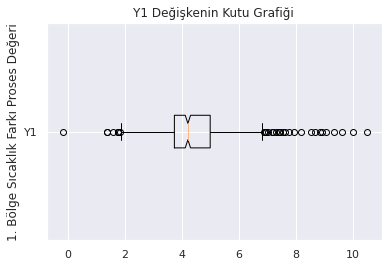

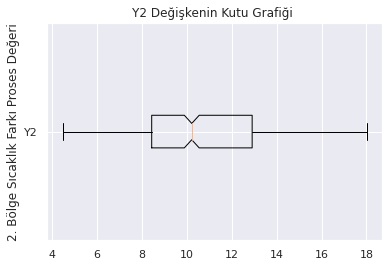

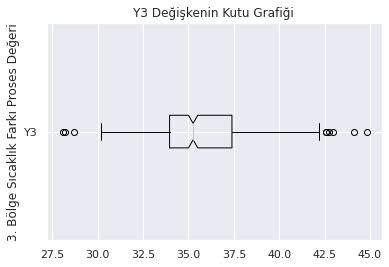

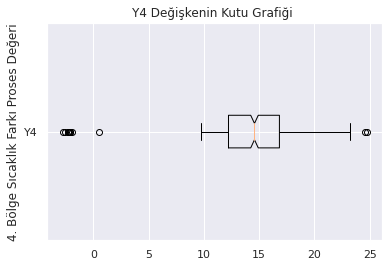

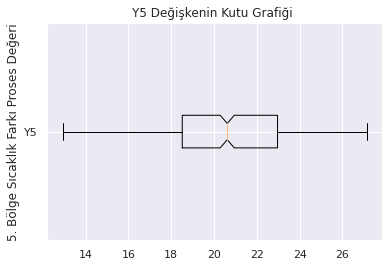

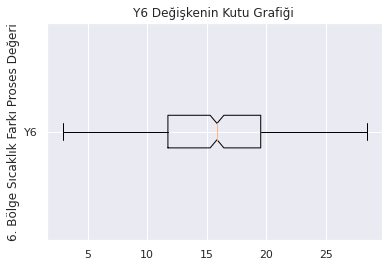

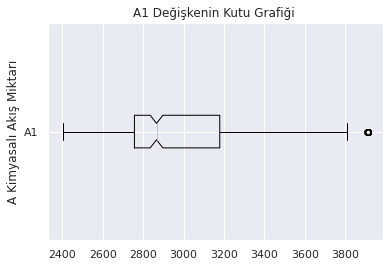

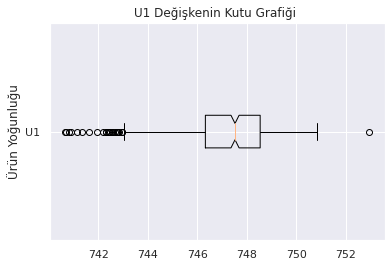

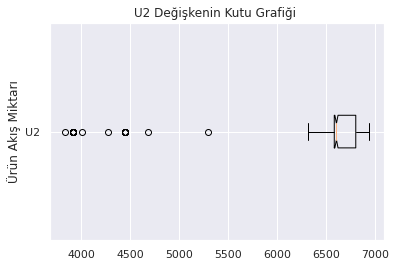

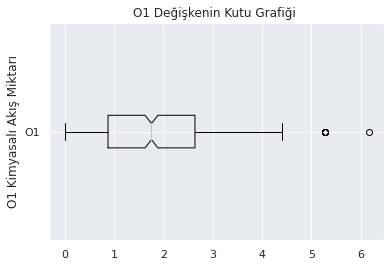

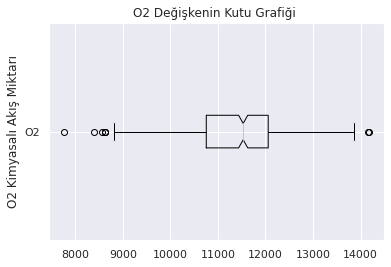

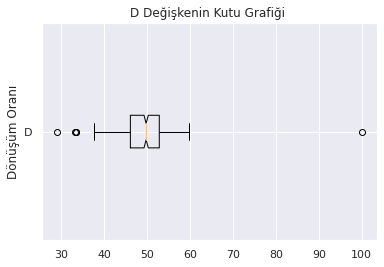

In [54]:
for i in My_Dict:
    quick_box(dF_Merge_mix,i,My_Dict[i])

Küme sayısına göre aykırı değer olarak belirlenen eşik değerin indisinden, aşağıda kalan kısımların yerine minimum değerler ile doldurularak baskılama işlemi yapılmıştır. Küme sayısını optimalliği, küme sayısının artışıyla gruplaşmanın artması ve aykırı değerlerin azalmasından etkilendiği için 16 olarak belirlenen n_neighbors eşik değerin indisi 42.gözlem olacak şekilde seçilmiştir. 

##### ----


#### dF_Merge_bfill 

In [55]:
lof1 = LocalOutlierFactor(n_neighbors=13, contamination="auto")

# Veri setini modele uydurarak/  fit ederek, tahminlerini  fit_predict() metodu ile elde edeceğiz.

pre1 = lof1.fit_predict(dF_Merge_bfill)

dF_Merge_bfill_score = lof1.negative_outlier_factor_

np.sort(dF_Merge_bfill_score)



array([-5.5844721 , -2.80962755, -2.46667436, -2.28359968, -2.27037434,
       -2.23152144, -2.21147096, -2.18823537, -2.11527051, -2.09575312,
       -2.03884881, -1.99122809, -1.98830585, -1.98406301, -1.97146571,
       -1.96706014, -1.95906748, -1.95077058, -1.92309926, -1.89708104,
       -1.87967845, -1.86339863, -1.82406423, -1.81039991, -1.80315345,
       -1.79059612, -1.71979329, -1.64447782, -1.62693091, -1.62001882,
       -1.59237214, -1.55300565, -1.54386879, -1.5194021 , -1.49454009,
       -1.49427818, -1.4916236 , -1.4517003 , -1.43220091, -1.41310235,
       -1.40091443, -1.39039139, -1.38623594, -1.38435604, -1.38034937,
       -1.36464938, -1.36263009, -1.35826237, -1.35403753, -1.34639042,
       -1.33747325, -1.326277  , -1.32037783, -1.31519359, -1.31383273,
       -1.29770377, -1.29422754, -1.29268249, -1.28592081, -1.27780952,
       -1.27419558, -1.26945498, -1.25923693, -1.25600559, -1.25524888,
       -1.25502132, -1.24955406, -1.2443493 , -1.23341403, -1.23

In [56]:
thshold1 = np.sort(dF_Merge_bfill_score)[54]
Outlier_Boolean1 = dF_Merge_bfill_score > thshold1 # Aykırı gözlem olmayan değerleri seçiyor.
Baskilama_Yönt1 = dF_Merge_bfill[dF_Merge_bfill_score  == thshold1]



In [57]:
Outliers1 = dF_Merge_bfill[~Outlier_Boolean1]
Outliers1

Result1 = Outliers1.to_records(index = False)



In [58]:
dF_Merge_bfill[~Outlier_Boolean1] = pd.DataFrame(Result1, index = dF_Merge_bfill[~Outlier_Boolean1].index)
dF_Merge_bfill[~Outlier_Boolean1]


,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D,E1,E2
2014-05-23,3.901,12.381,3566.675,37.034,14.589,21.640,25.849,747.456,6584.921,0.000,10216.736,54.236,0.801,0.7875
2014-06-03,3.459,11.086,4178.853,36.550,14.825,18.645,21.355,747.095,6580.742,0.000,9819.754,44.762,0.979,1.3880
2014-06-04,3.421,11.665,4094.762,34.482,14.081,18.326,20.912,746.577,6590.518,0.000,12439.849,43.377,0.979,1.3880
2014-06-05,3.893,13.060,3911.108,33.961,14.575,18.518,21.046,746.329,6586.214,1.762,10755.793,46.079,0.979,1.3880
2014-06-06,4.545,14.617,3976.223,32.478,13.549,17.786,20.909,746.092,6583.938,3.524,12003.378,49.783,0.979,1.3880
2014-06-17,3.140,11.744,3116.176,30.128,12.566,18.559,19.187,746.610,5919.075,2.643,10328.758,48.315,0.979,0.7120
2014-07-28,5.018,13.960,3116.069,33.572,11.978,20.572,23.188,747.859,6588.518,0.881,17365.471,54.710,2.136,0.7030
2014-08-17,4.248,13.478,3025.076,34.979,11.181,20.572,22.219,747.840,6906.905,0.881,11598.137,59.829,2.047,0.4450
2014-08-24,4.608,12.558,2900.034,35.329,11.486,24.611,19.336,746.918,6879.156,0.000,7680.923,59.475,2.136,1.0680
2014-08-31,5.094,14.315,2937.559,38.169,11.986,20.464,22.180,749.016,6906.415,3.524,14670.644,55.865,1.335,1.3530


In [59]:
dF_Merge_bfill.shape

(450, 14)

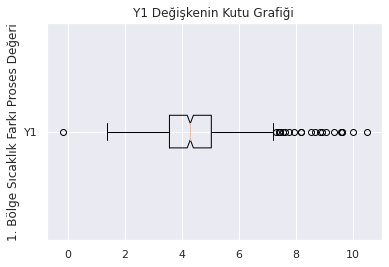

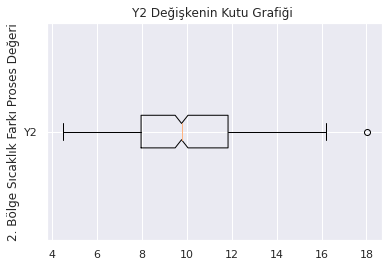

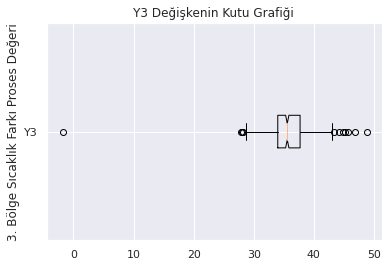

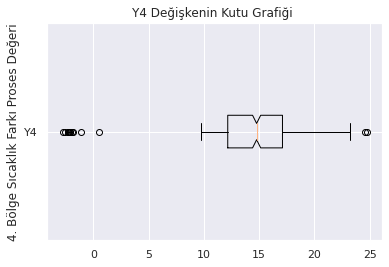

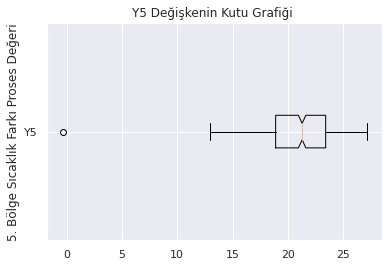

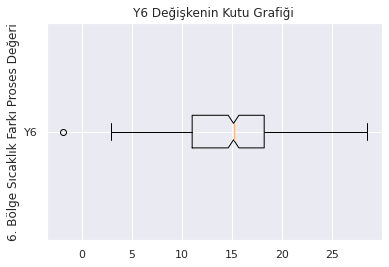

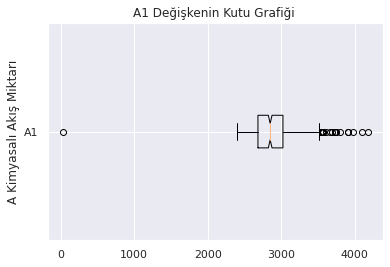

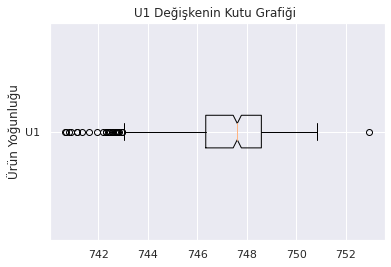

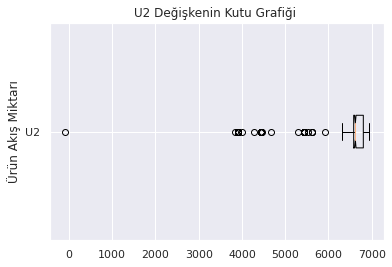

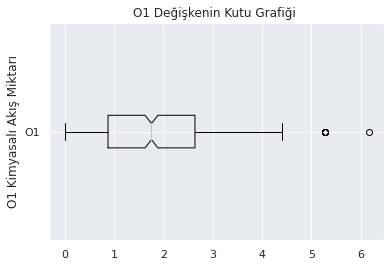

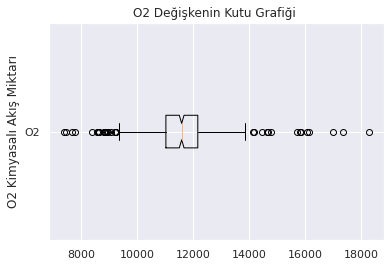

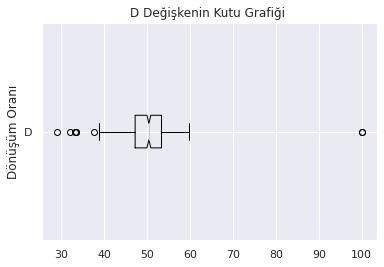

In [60]:
for i in My_Dict:
    quick_box(dF_Merge_bfill,i,My_Dict[i])

Aynı işllemleri backward fill ile doldurduğumuz veri setine uyguladğımızda aykırı değerlerin bulunduğu  değişken sayısı daha çok olmaktadır.

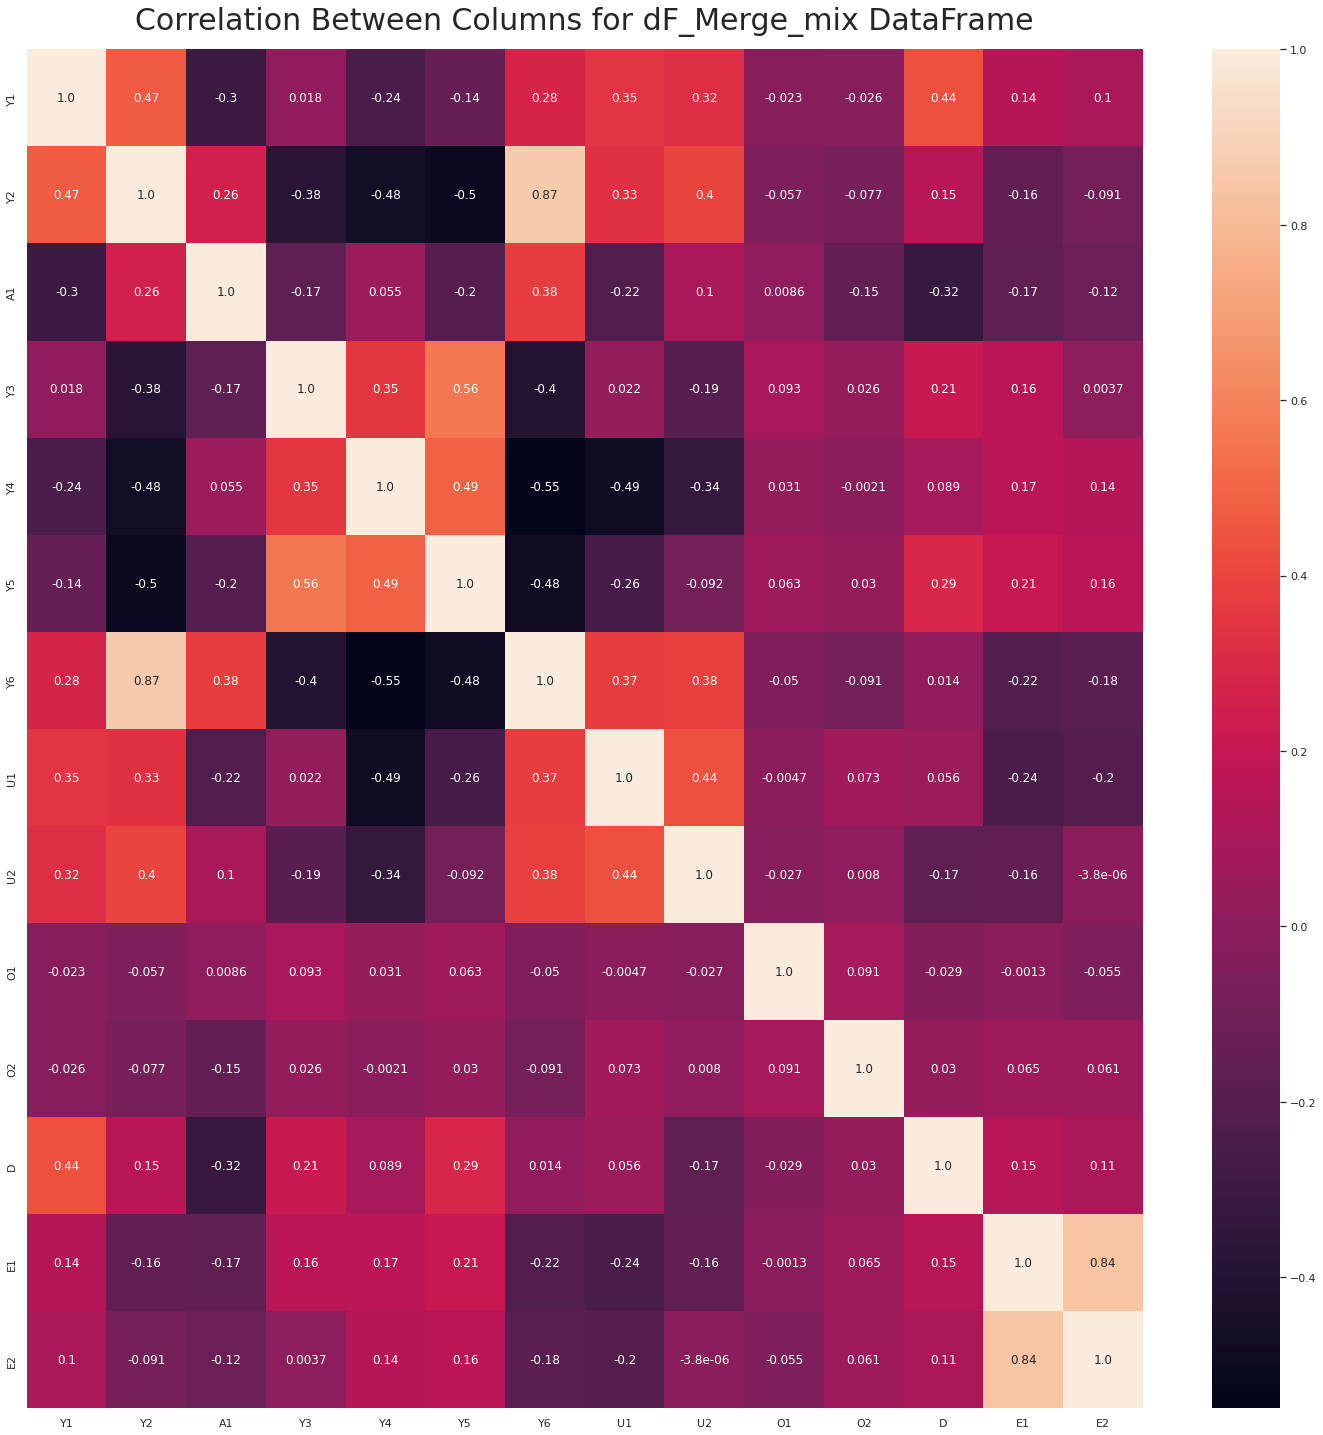

In [61]:
plt.figure(figsize = (25,25))
corrMap = sns.heatmap(dF_Merge_mix.corr(), annot=True, fmt = '0.2')
corrMap.set_title('Correlation Between Columns for dF_Merge_mix DataFrame', fontdict={'fontsize':30}, pad=20);

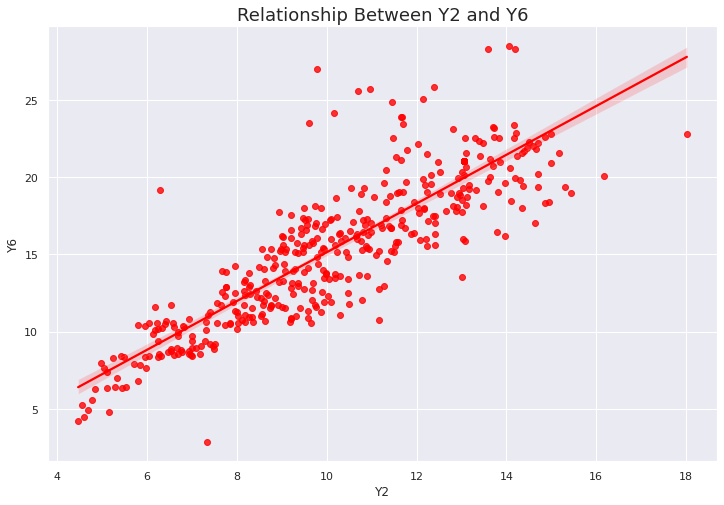

In [62]:
plt.figure(figsize=(12,8))
sns.regplot(x=dF_Merge_mix["Y2"], y=dF_Merge_mix["Y6"], color='red')
plt.title("Relationship Between Y2 and Y6", size=18)
plt.xlabel("Y2", size=12)
plt.ylabel("Y6", size=12)
plt.show()

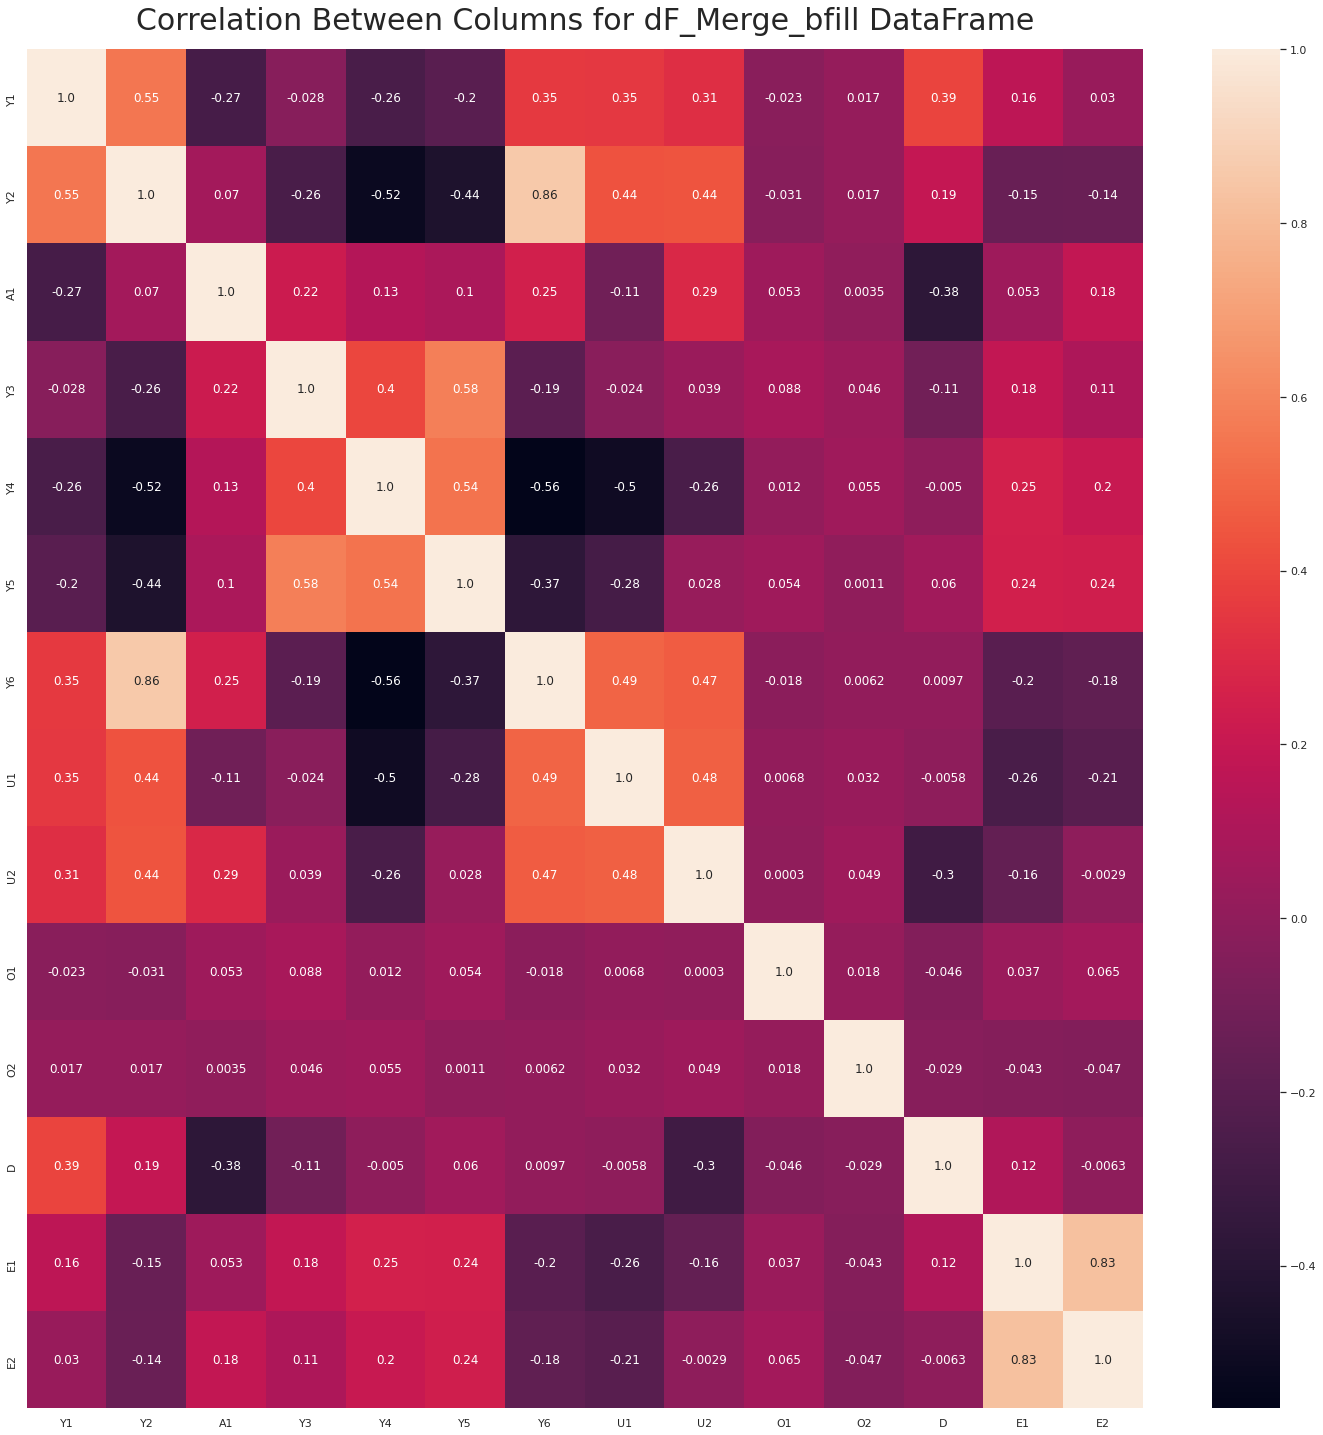

In [63]:
plt.figure(figsize = (25,25))
corrMap = sns.heatmap(dF_Merge_bfill.corr(), annot=True, fmt = '0.2')
corrMap.set_title('Correlation Between Columns for dF_Merge_bfill DataFrame', fontdict={'fontsize':30}, pad=20);

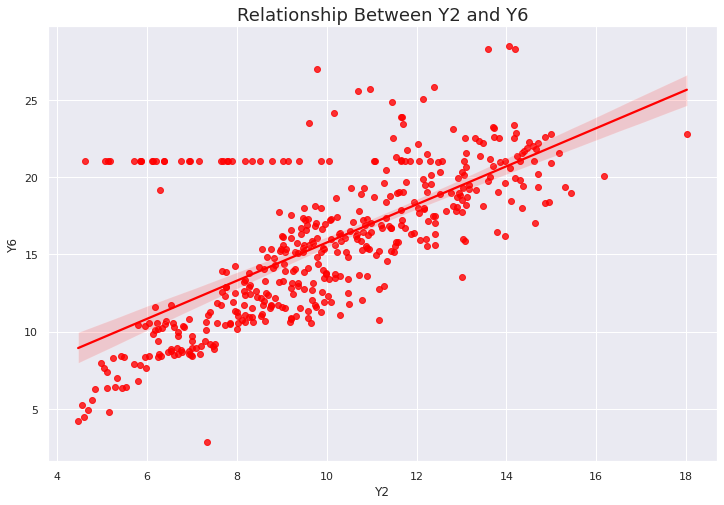

In [64]:
plt.figure(figsize=(12,8))
sns.regplot(x=dF_Merge_bfill["Y2"], y=dF_Merge_mix["Y6"], color='red')
plt.title("Relationship Between Y2 and Y6", size=18)
plt.xlabel("Y2", size=12)
plt.ylabel("Y6", size=12)
plt.show()

In [65]:
dF_Merge_mix.tail()

,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D,E1,E2
2015-08-06,1.939,6.423,3384.061,38.090,15.672,21.250,10.688,748.408,6407.897,0.000,11835.961,44.482,0.890,0.311
2015-08-07,1.750,6.575,3386.171,37.028,14.897,20.185,10.585,748.842,6407.002,2.643,13246.417,43.149,0.890,0.311
2015-08-08,1.583,6.043,3386.488,36.227,14.507,19.271,10.534,748.274,6407.925,3.524,11379.239,39.720,0.890,0.311
2015-08-09,1.379,5.791,3387.801,34.564,13.959,18.678,10.405,747.380,6409.794,0.881,13564.363,40.379,2.314,1.139
2015-08-10,1.381,5.955,3383.238,33.869,13.897,18.159,10.386,747.445,6407.599,0.881,11179.693,39.187,2.314,1.139


# Time Series

Zaman serisi veri noktalarının sıklığını ifade etmektedir. Düzenli zaman aralıklarında (belirli bir periyoda sahiptirler) tipik olarak ölçülür.

### dF_Merge_mix DataFrame'i için Zaman Serisi

In [66]:
dF_Merge_mix['Time'] = np.arange(len(dF_Merge_mix.index))
dF_Merge_mix.tail()

,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D,E1,E2,Time
2015-08-06,1.939,6.423,3384.061,38.090,15.672,21.250,10.688,748.408,6407.897,0.000,11835.961,44.482,0.890,0.311,445
2015-08-07,1.750,6.575,3386.171,37.028,14.897,20.185,10.585,748.842,6407.002,2.643,13246.417,43.149,0.890,0.311,446
2015-08-08,1.583,6.043,3386.488,36.227,14.507,19.271,10.534,748.274,6407.925,3.524,11379.239,39.720,0.890,0.311,447
2015-08-09,1.379,5.791,3387.801,34.564,13.959,18.678,10.405,747.380,6409.794,0.881,13564.363,40.379,2.314,1.139,448
2015-08-10,1.381,5.955,3383.238,33.869,13.897,18.159,10.386,747.445,6407.599,0.881,11179.693,39.187,2.314,1.139,449


### Zaman Grafiği

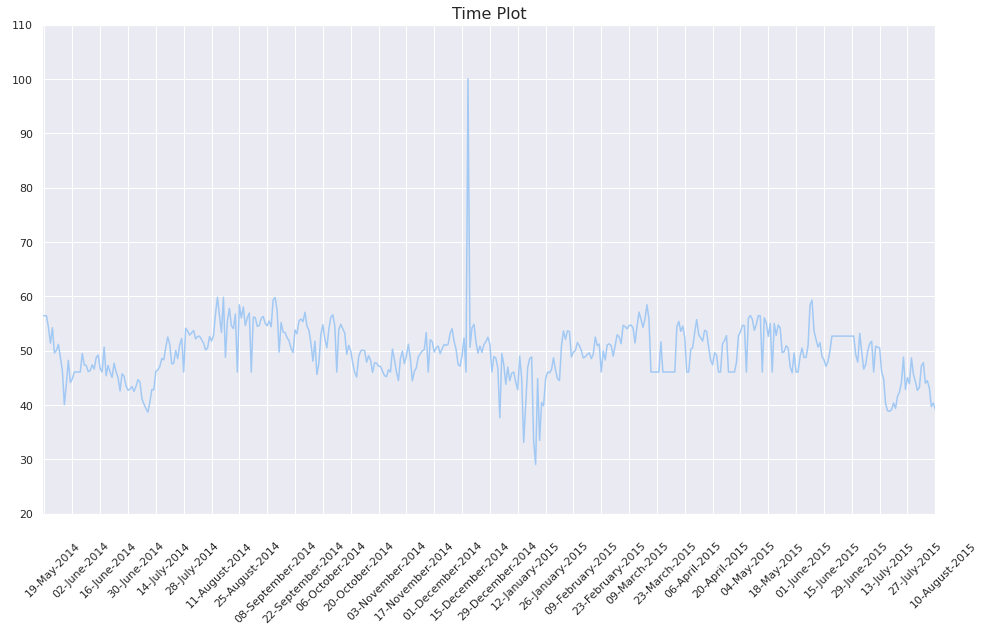

In [69]:
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU, WeekdayLocator, DateFormatter

def time_plot(df, column_name, title):
    fig = plt.figure(figsize=(16, 9))

    ax = df[column_name].plot(xlim=['2014-05-18T00:00:00.000000','2015-08-10T00:00:00.000000'],ylim=[20,110])

    ax.set(xlabel='')
    ax.set_title(title, size=16)

    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=0, interval=2))
    ax.xaxis.set_major_formatter(DateFormatter("\n\n%d-%B-%Y"))

    plt.xticks(rotation='45');

time_plot(dF_Merge_mix, "D", "Time Plot")


Zaman grafiği zamana bağlı olarak değişkenin nasıl etkilendiğini göstermektedir. Bu grafik, zaman değişkeninin anlaşılması adına başlangıç noktası olarak kullanılmıştır.


### Gecikme Grafiği

In [70]:
dF_Merge_mix['Lag'] = dF_Merge_mix['D'].shift(1)
dF_Merge_mix = dF_Merge_mix.reindex(columns=['D', 'Lag'])

dF_Merge_mix.head()

,D,Lag
2014-05-18,56.434,NaN
2014-05-19,56.434,56.434
2014-05-20,56.434,56.434
2014-05-21,54.244,56.434
2014-05-22,51.388,54.244


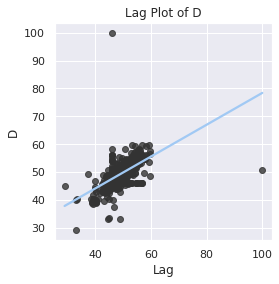

In [71]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag', y='D', data=dF_Merge_mix, ci=None, scatter_kws=dict(color='0.20'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of D');

Gecikme grafiği verilen zaman serisinin rastgele değerlerden oluşup oluşmadığının anlaşılmasına yardımcı olur. Değerler rastgele olsaydı, gözle görülür bir düzen oluşmazdı. Fakat yukarıda elde edilen Gecikme Grafiği'nde, verilerin belirli bir "pattern" oluşturduğu gözlemleniyor.Böylece, ölçülen değerlerin bir önceki günün değerleriyle ilişkili olduğu söylenebilir.Bu ilişkinin çok güçlü olduğu söylenemez

# Time Series Forecasting

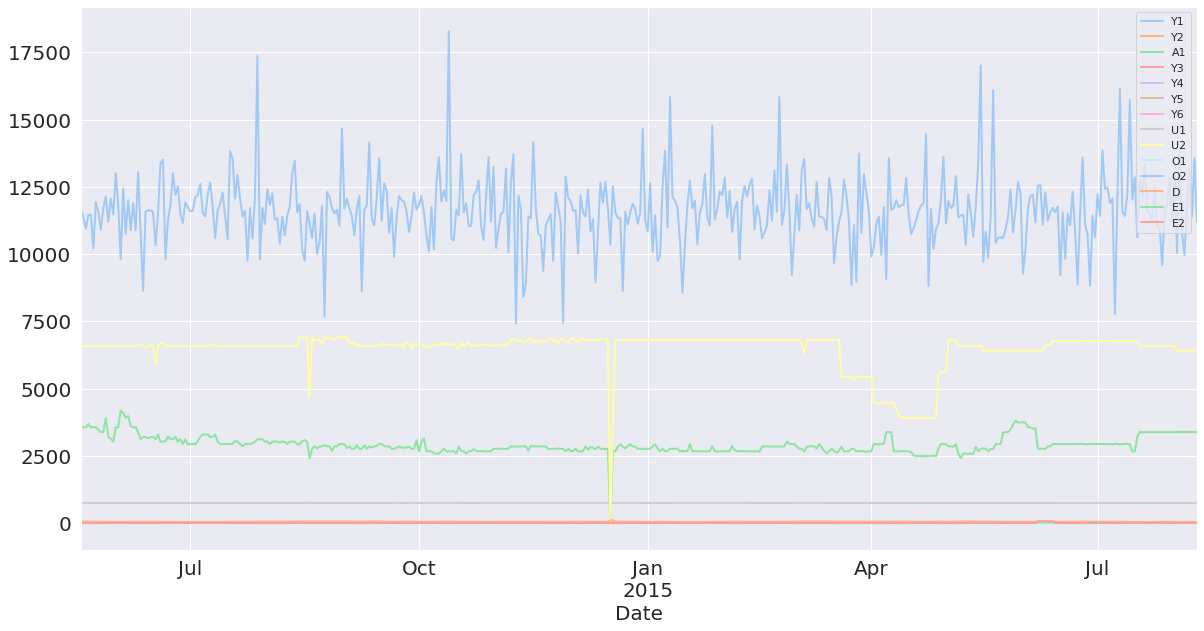

In [98]:
dF_Merge_mix.plot(figsize= (20,10), linewidth=2, fontsize = 20)
plt.xlabel("Date", fontsize=20);

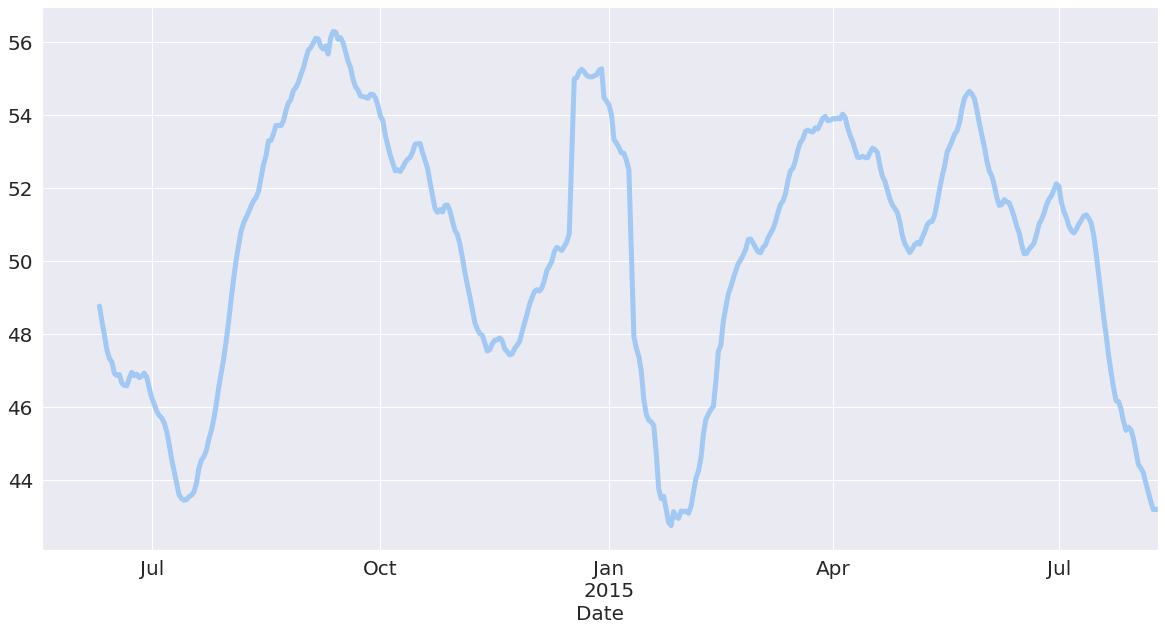

In [99]:
d = dF_Merge_mix['D']
d.rolling(24).mean().plot(figsize= (20,10), linewidth=5, fontsize = 20)
plt.xlabel("Date", fontsize=20);

In [104]:
dF_Merge_mix.columns

Index(['Y1', 'Y2', 'A1', 'Y3', 'Y4', 'Y5', 'Y6', 'U1', 'U2', 'O1', 'O2', 'D',
       'E1', 'E2'],
      dtype='object')

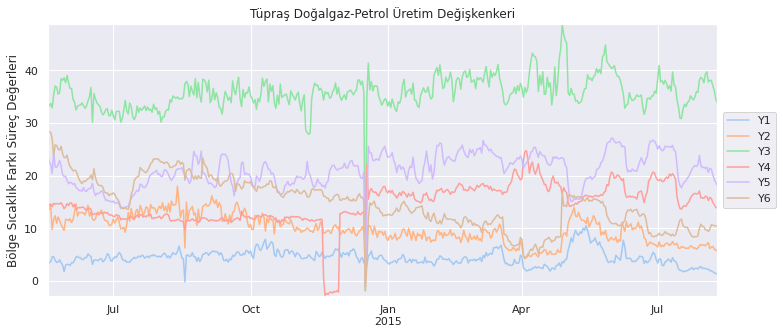

In [129]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Bölge Sıcaklık Farkı Süreç Değerleri'
xlabel=''

ax = dF_Merge_mix['Y1'].plot(figsize=(12,5),title=title,legend=True)
ax = dF_Merge_mix['Y2'].plot(figsize=(12,5),title=title,legend=True)
ax = dF_Merge_mix['Y3'].plot(figsize=(12,5),title=title,legend=True)
ax = dF_Merge_mix['Y4'].plot(figsize=(12,5),title=title,legend=True)
ax = dF_Merge_mix['Y5'].plot(figsize=(12,5),title=title,legend=True)
ax = dF_Merge_mix['Y6'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


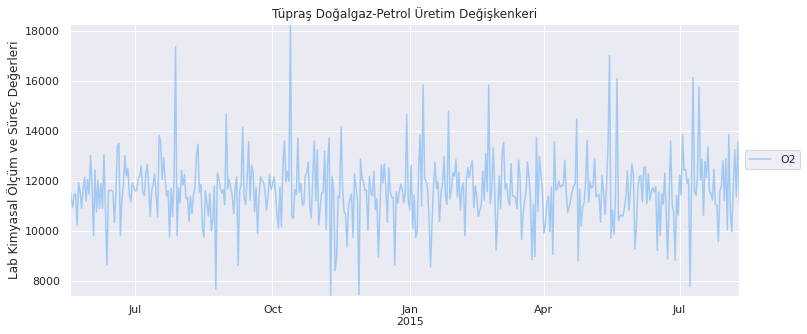

In [135]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Lab Kimyasal Ölçüm ve Süreç Değerleri'
xlabel=''

ax = dF_Merge_mix['O2'].plot(figsize=(12,5),title=title,legend=True)

ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

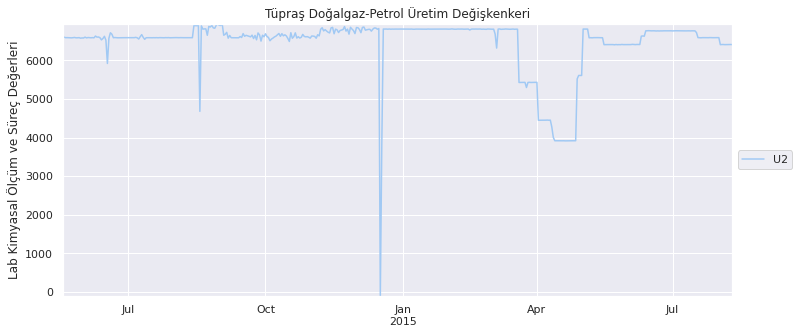

In [140]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Lab Kimyasal Ölçüm ve Süreç Değerleri'
xlabel=''

ax = dF_Merge_mix['U2'].plot(figsize=(12,5),title=title,legend=True)

ax.autoscale(axis='y',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

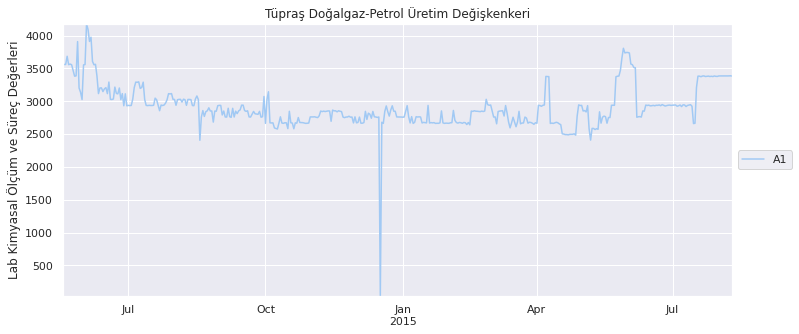

In [138]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Lab Kimyasal Ölçüm ve Süreç Değerleri'
xlabel=''


ax = dF_Merge_mix['A1'].plot(figsize=(12,5),title=title,legend=True)

ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

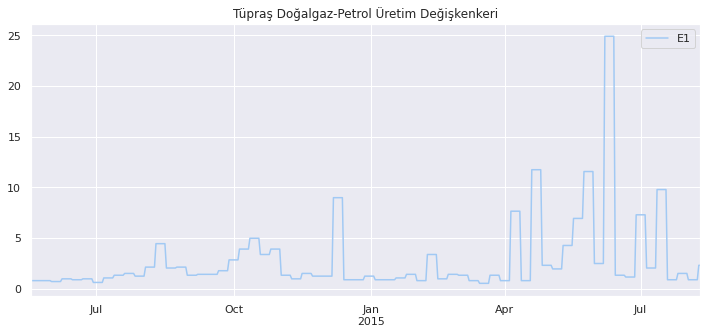

In [123]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Bölge Sıcaklık Farkı Süreç Değerleri'
xlabel=''
ax = dF_Merge_mix['E1'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

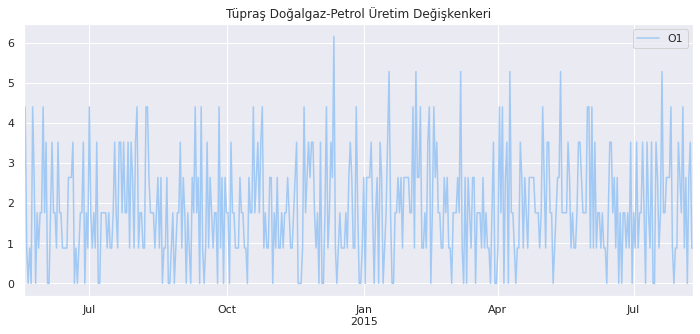

In [122]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Bölge Sıcaklık Farkı Süreç Değerleri'
xlabel=''
ax = dF_Merge_mix['O1'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

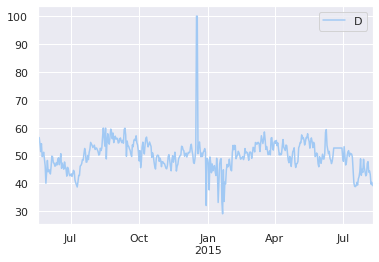

In [121]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Bölge Sıcaklık Farkı Süreç Değerleri'
xlabel=''
dF_Merge_mix['D'].plot(legend=True)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

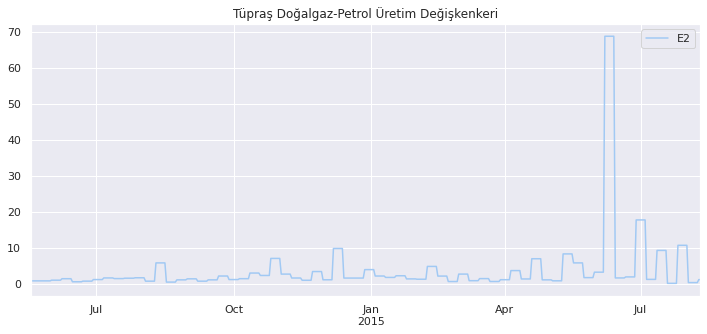

In [120]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Bölge Sıcaklık Farkı Süreç Değerleri'
xlabel=''
ax = dF_Merge_mix['E2'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

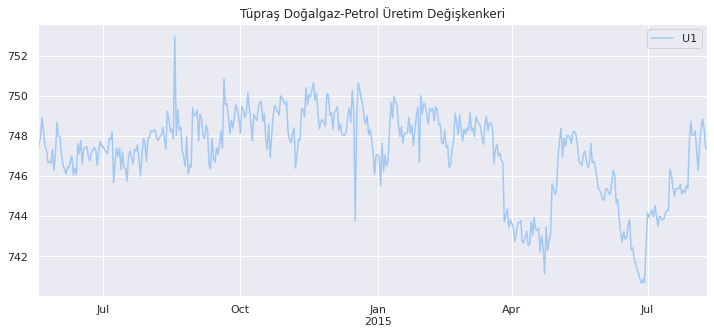

In [119]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Bölge Sıcaklık Farkı Süreç Değerleri'
xlabel=''
ax = dF_Merge_mix['U1'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

In [ ]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

### ACF ve PACF Grafikleri

In [ ]:
!pip install statsmodels==0.13.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


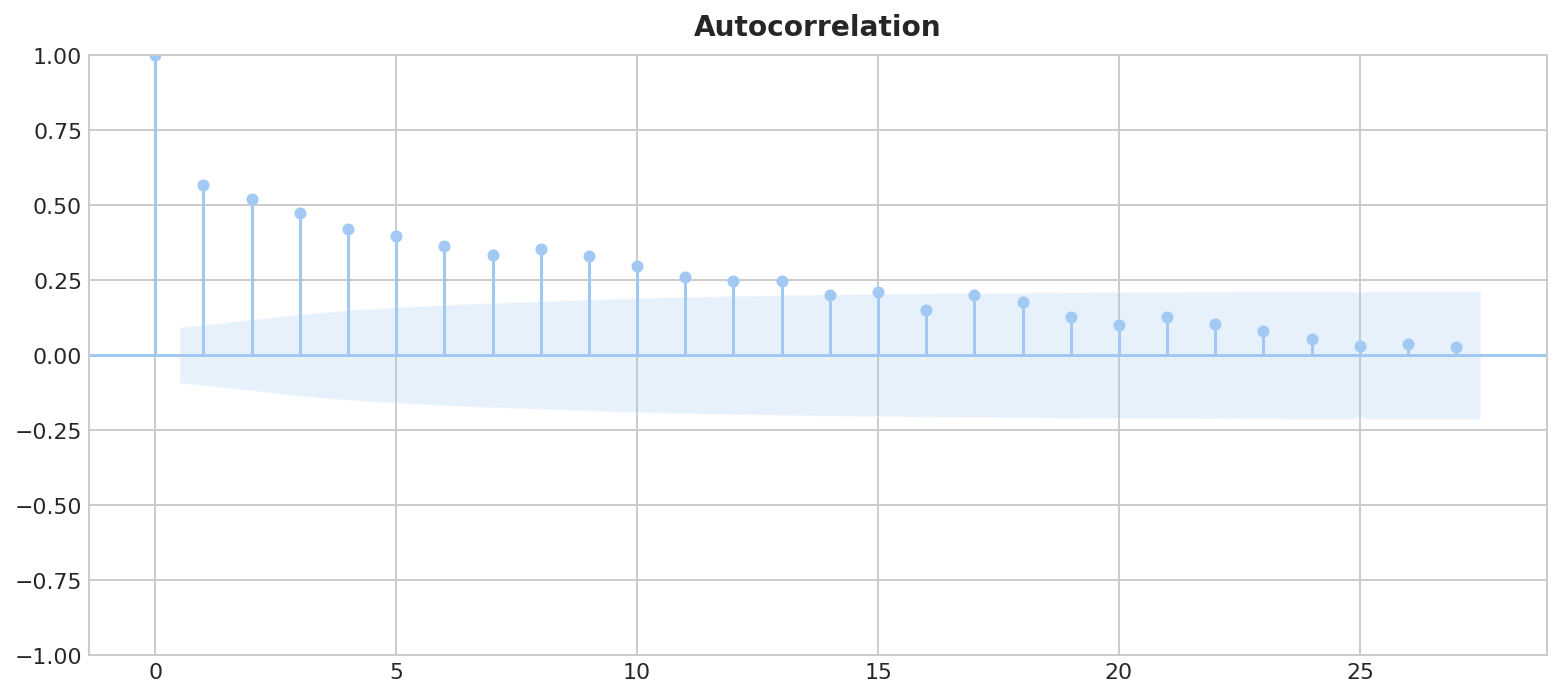

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dF_Merge_mix[['D']])
plt.show()

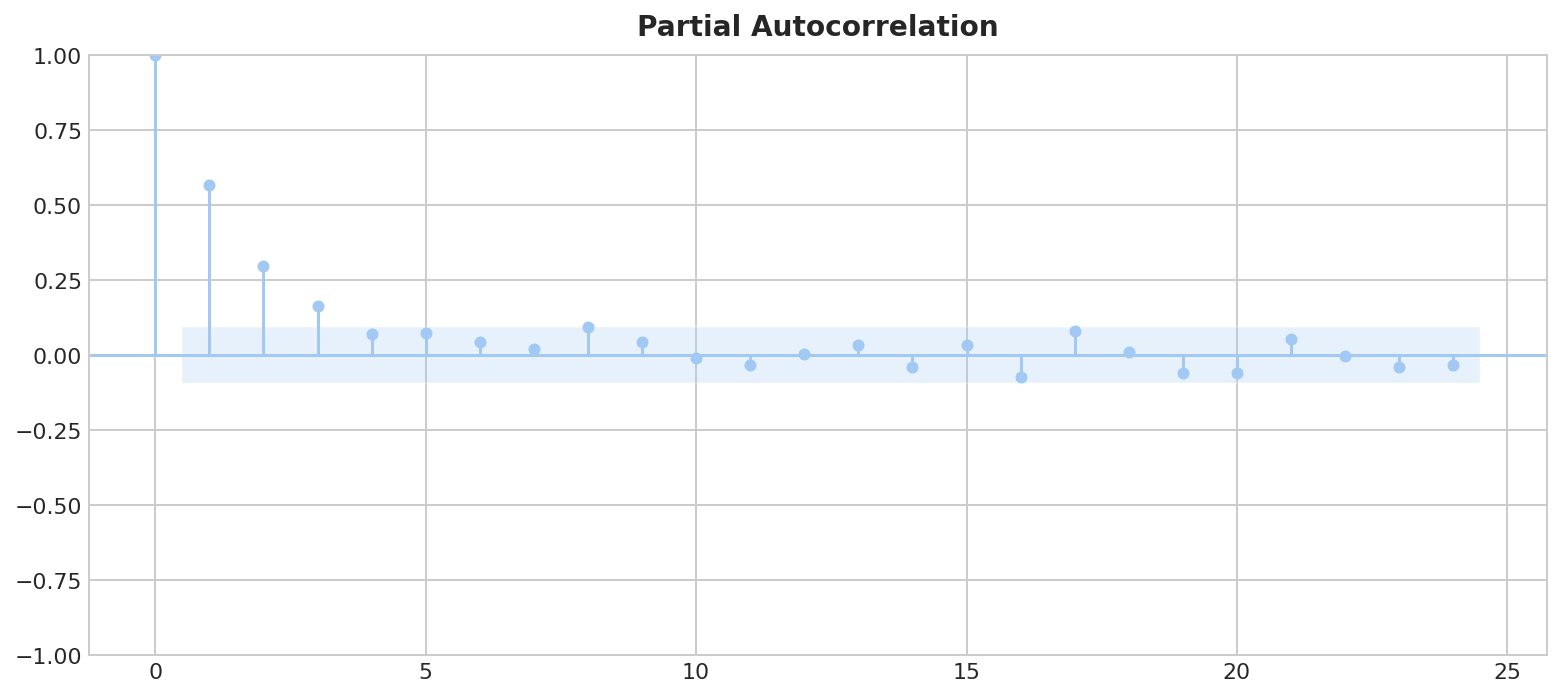

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dF_Merge_mix[['D']], lags=24)
plt.show()

### Trend Grafiği

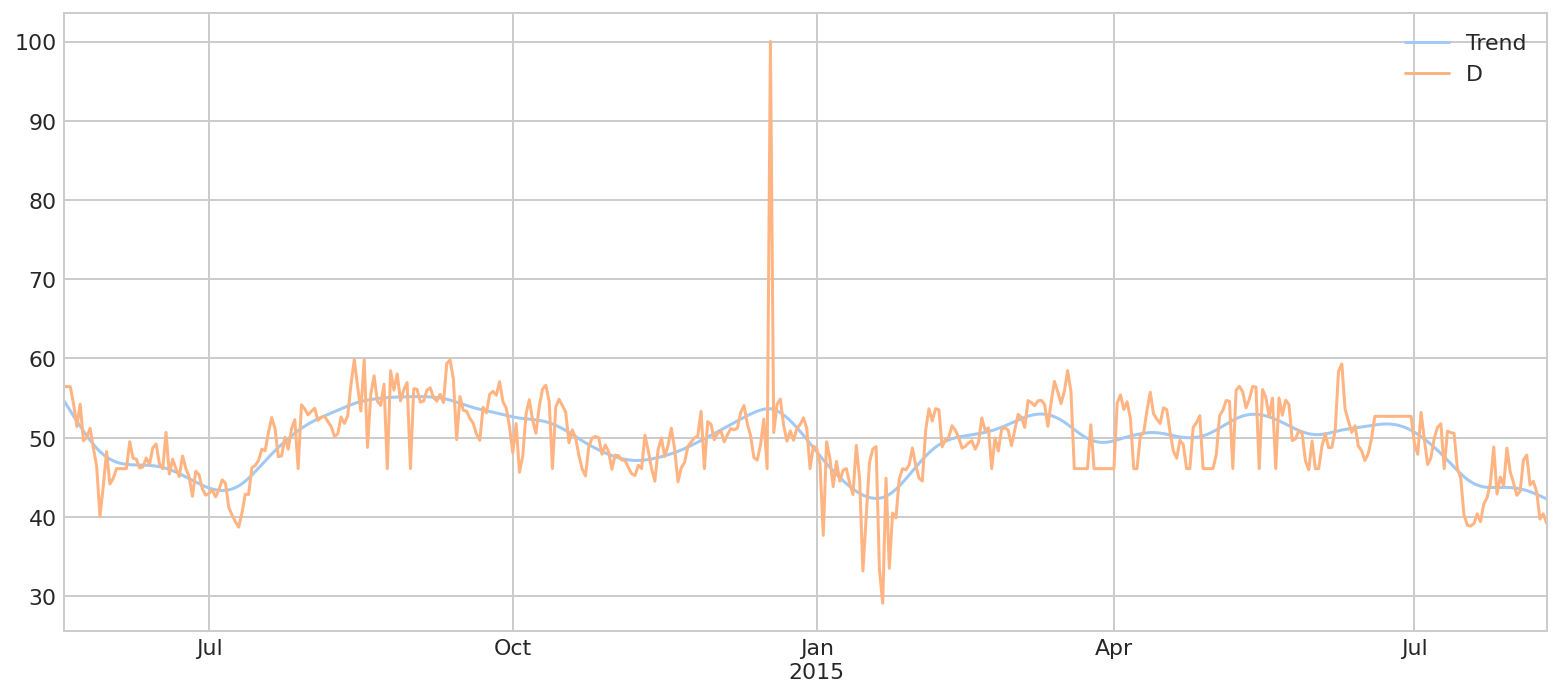

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(dF_Merge_mix['D'], lamb=1600)
dF_Merge_mix['Trend'] = gdp_trend
dF_Merge_mix[['Trend','D']].plot().autoscale(axis='x',tight=True);

### Seasonal Decompose Grafiği

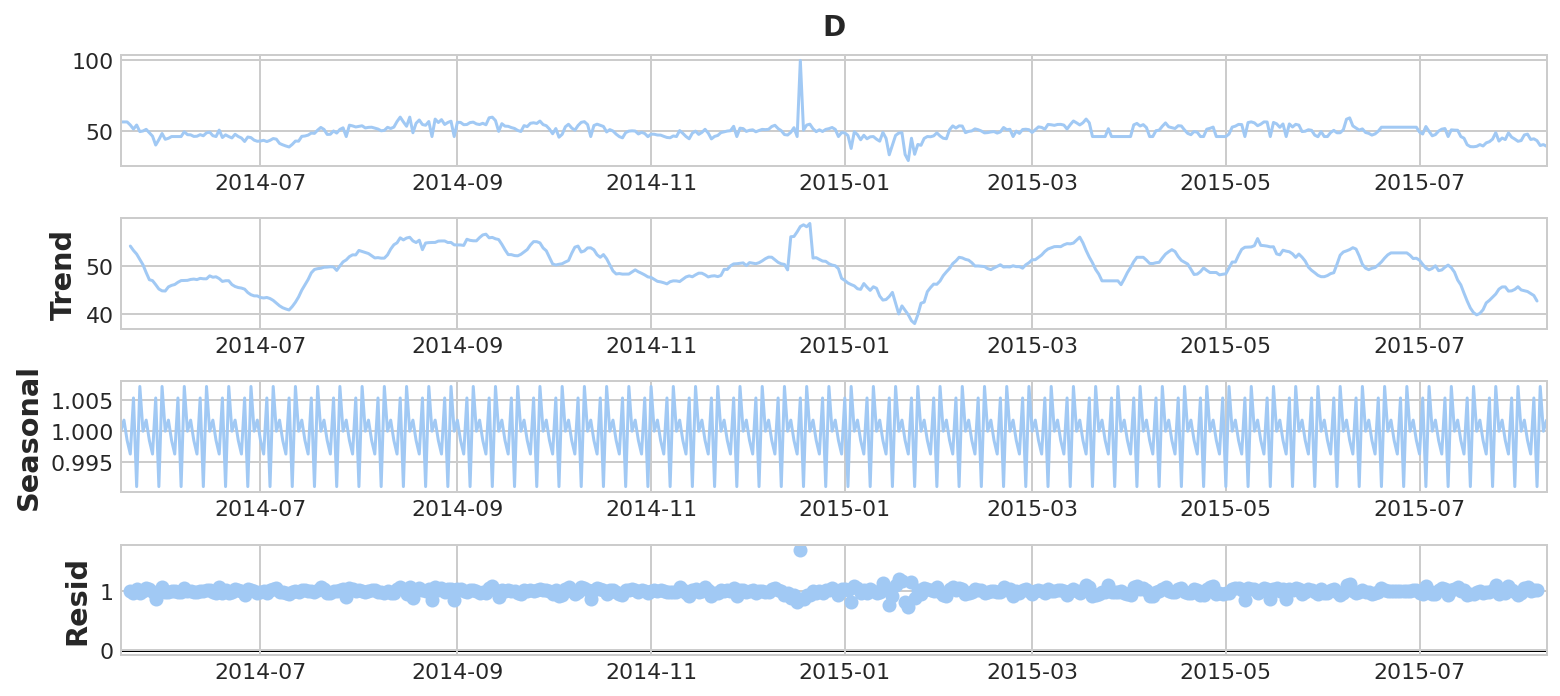

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal = seasonal_decompose(dF_Merge_mix['D'], model='multiplicative') 
seasonal.plot();

## Veri Setinin Train-Test'e Ayrılması

In [ ]:
#Train Test Split
train_data = dF_Merge_mix.iloc[:300] 
test_data = dF_Merge_mix.iloc[300:]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['D'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [ ]:
test_predictions = fitted_model.forecast(150).rename('HW Forecast')
test_predictions.shape

(150,)

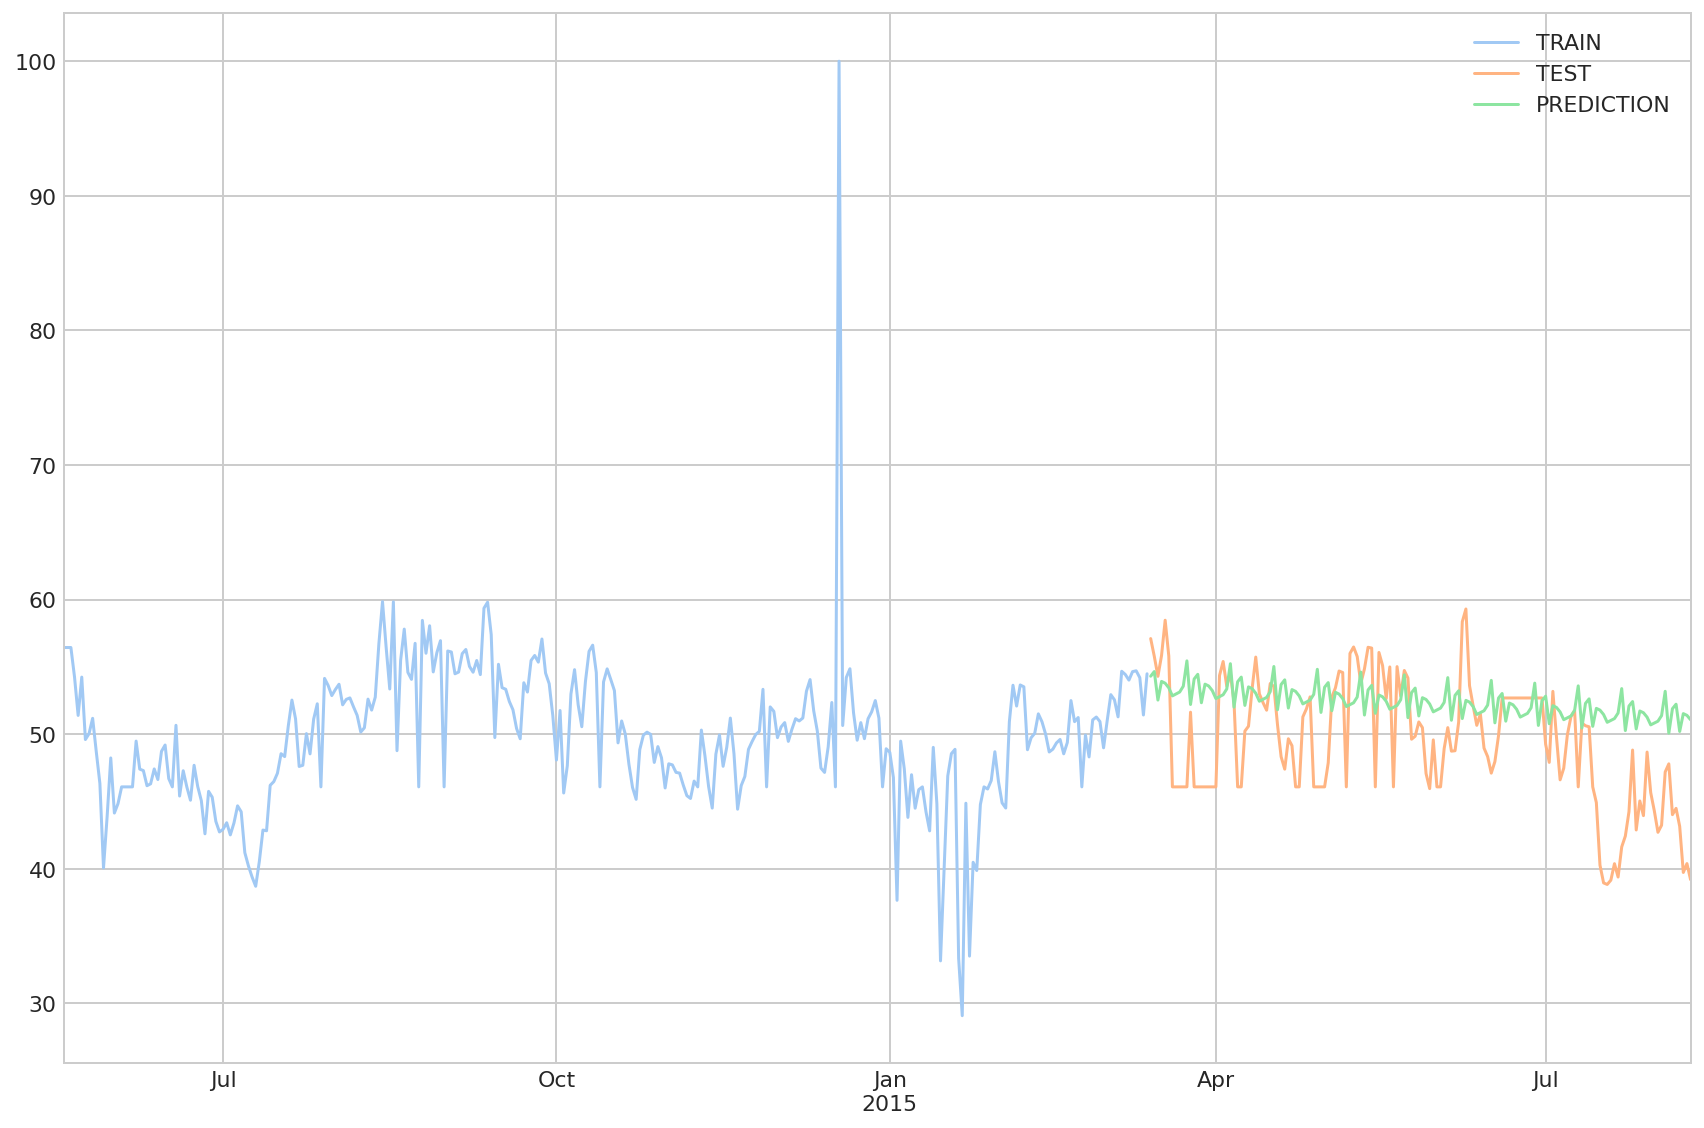

In [ ]:
train_data['D'].plot(legend=True,label='TRAIN')
test_data['D'].plot(legend=True,label='TEST',figsize=(12,8));
test_predictions.plot(legend=True,label='PREDICTION');

In [ ]:
from sklearn.metrics import mean_squared_error as mse ,mean_absolute_error as mae

### ARIMA

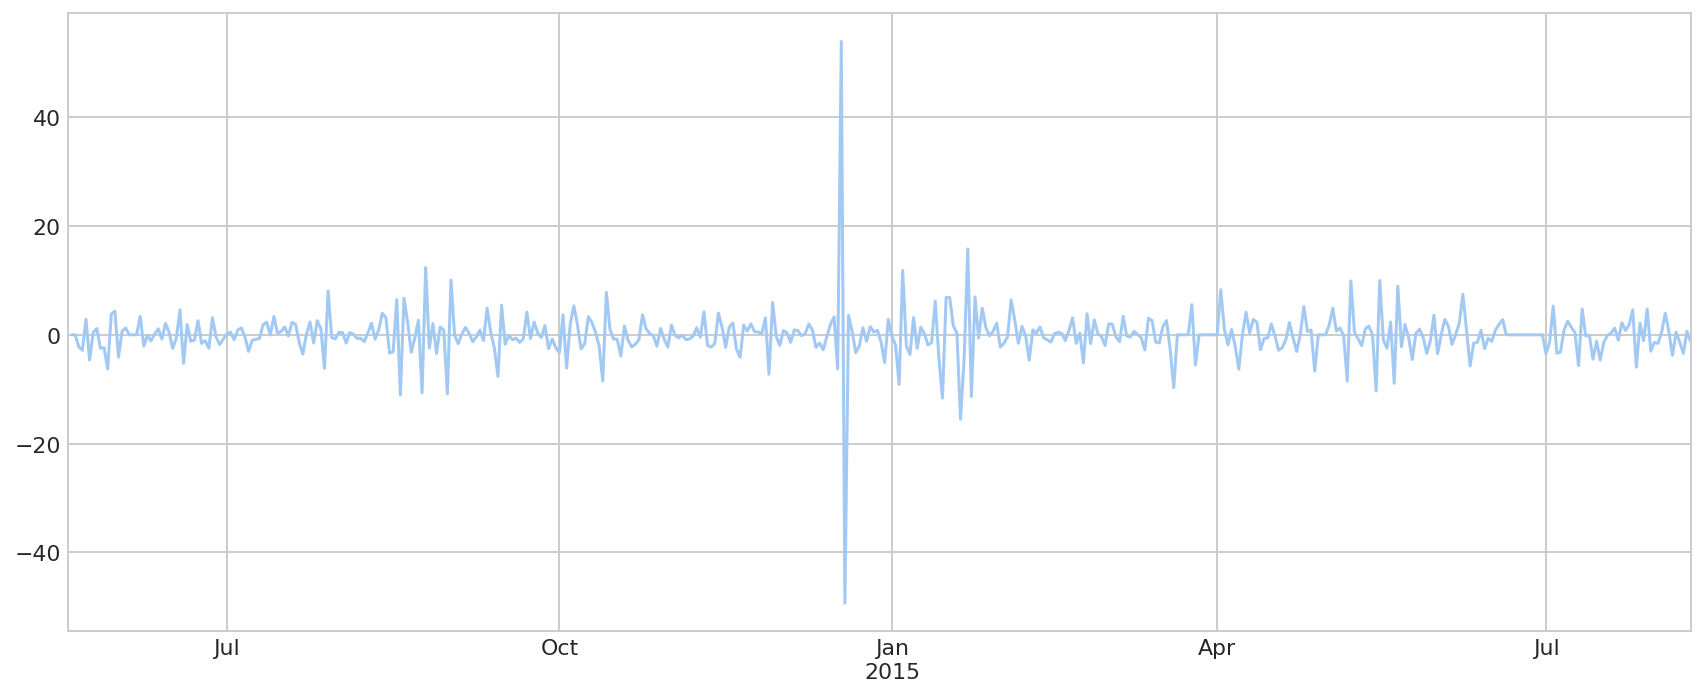

In [ ]:
#datayı stabil yapmak için

from statsmodels.tsa.statespace.tools import diff

dF_Merge_mix['D'] = diff(dF_Merge_mix['D'],k_diff=1)
dF_Merge_mix['D'].plot(figsize=(12,5));

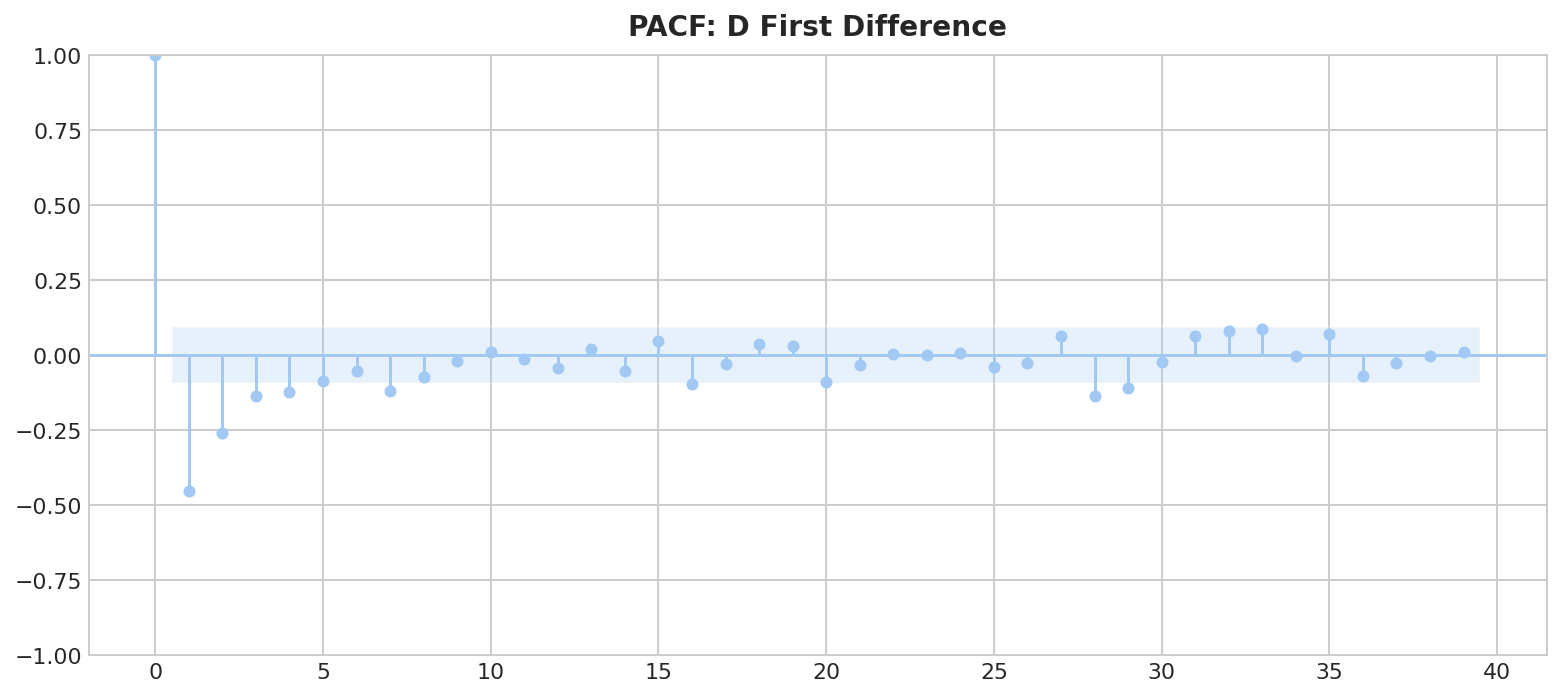

In [ ]:
title='PACF: D First Difference'
plot_pacf(dF_Merge_mix['D'].dropna(),title=title,lags=np.arange(40)); 

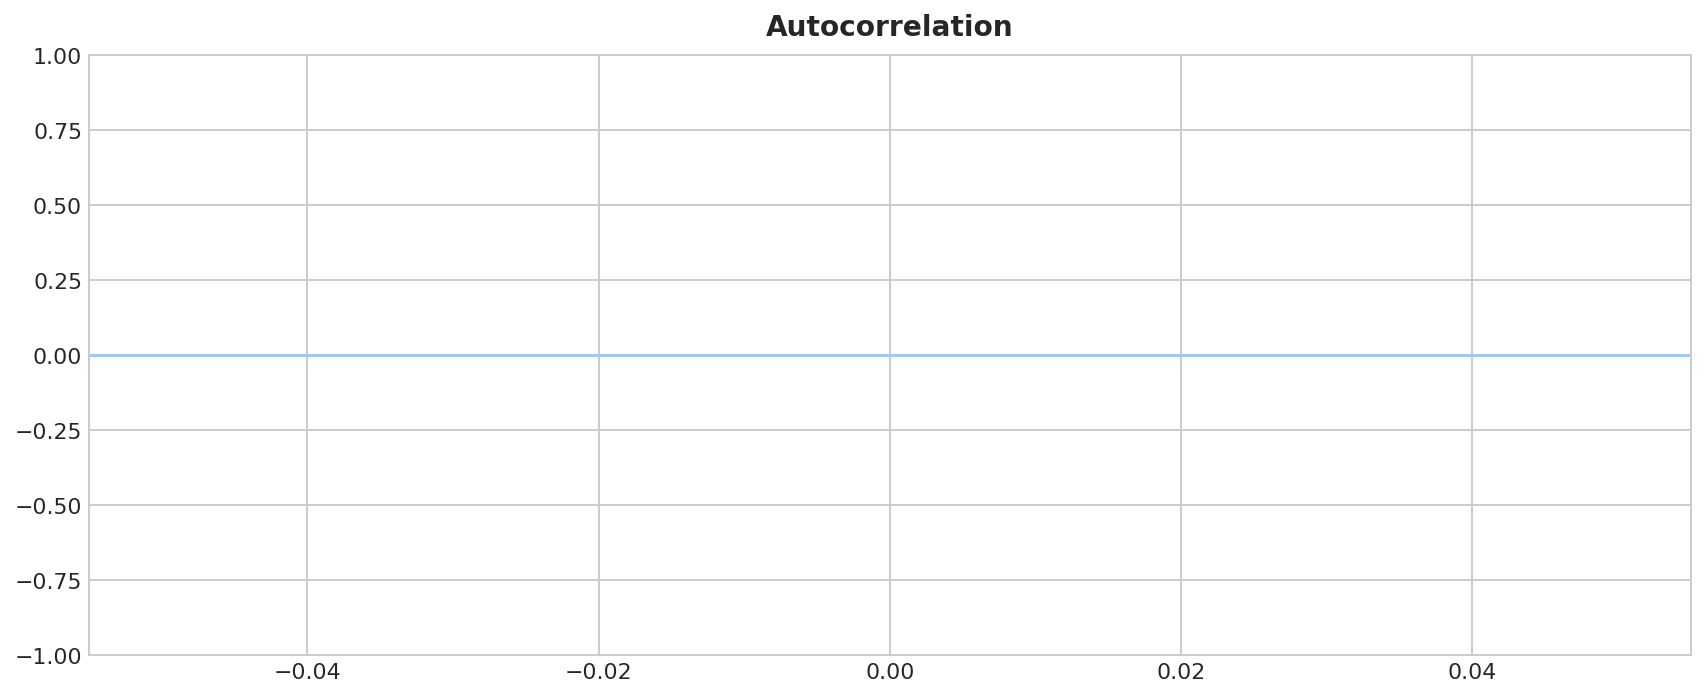

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(dF_Merge_mix['D'],ax=ax);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbb3edfd-1624-4bad-81ae-d8c9933d26e7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>